In [2]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
pd.plotting.register_matplotlib_converters()
pd.options.display.max_rows=50
pd.options.display.max_columns=100
plt.xkcd()
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
plt.rcParams.update({'font.size':18})
sns.set_style('darkgrid')
plt.rcParams.update({'font.family':'Humor Sans'})

# My colors to be used in exploration
green1 = [22/256, 111/256, 76/256]
blue1 = [29/256, 82/256, 120/256]
green2 = [0/256, 83/256, 47/256]
blue2 = [38/256, 51/256, 86/256]
green3 = [50/256, 199/256, 127/256]
blue3 = [26/256, 196/256, 219/256]
red1 = [125/256, 25/256, 0/256]
red2 = [178/256, 24/256, 71/256]

In [5]:
df=pd.read_csv('data/grade_pred_tidy.csv',index_col=0)
df

gender branch dropper tenth_board twelvth_board coaching    coaching_city  \
1     Male   BSBE      No        CBSE          CBSE       No              NaN   
2     Male   BSBE      No        CBSE         State      Yes           Indore   
3     Male     CL      No        CBSE          CBSE      Yes            patna   
4     Male     CL      No        CBSE          CBSE      Yes            patna   
5     Male     ME      No        CBSE          CBSE      Yes         Kottayam   
..     ...    ...     ...         ...           ...      ...              ...   
376   Male     MC     Yes        CBSE          CBSE      Yes             Pune   
377   Male     ME      No        CBSE          CBSE      Yes         Kottayam   
378   Male     EP      No        CBSE          CBSE      Yes            Delhi   
379   Male     CE      No        CBSE          CBSE      Yes             Kota   
380   Male   BSBE     Yes        CBSE          CBSE       No  North Lakhimpur   

            coaching_name       home_state        home_city  fam_size  \
1                     NaN        Rajasthan          Bikaner         9   
2                   Allen   Madhya Pradesh        Maheshwar         6   
3                     vmc            bihar          sasaram         4   
4                     vmc            bihar          sasaram         4   
5                 T.I.M.E      Maharashtra         Yavatmal         5   
..                    ...              ...              ...       ...   
376              Dakshana          Gujarat           Rajkot         5   
377                  Time    Uttar pradesh         GHAZIPUR         5   
378  Pace IIT and Medical  DELHI/NEW DELHI            Delhi         4   
379                 Allen        Rajasthan             Kota         4   
380           No coaching            ASSAM  North Lakhimpur         4   

            mom_ed         dad_ed    mom_job   dad_job  \
1    Post Graduate  Post Graduate  Housewife  Business   
2         Graduate  Post Graduate  Housewife      Govt   
3        10th Pass       Graduate  Housewife  Business   
4        10th Pass       Graduate  Housewife  Business   
5        10th Pass      12th Pass  Housewife      Else   
..             ...            ...        ...       ...   
376     <10th Pass      10th Pass  Housewife      Else   
377     <10th Pass      12th Pass  Housewife      Else   
378      10th Pass      12th Pass  Housewife      Else   
379      12th Pass      12th Pass  Housewife  Business   
380      12th Pass      12th Pass    Medical      Else   

                  study_time       tech_clubs  cult_clubs       fest  \
1                  Irregular   CnA, Quiz club      Debsoc  Techniche   
2    Everyday upto 2-4 hours        CnA, Aero         NaN        NaN   
3                        NaN              CnA         NaN  Techniche   
4                        NaN              CnA         NaN  Techniche   
5    Everyday upto 0-2 hours         Robotics         NaN        NaN   
..                       ...              ...         ...        ...   
376                Irregular              FEC         NaN        NaN   
377  Everyday upto 0-2 hours  Automobile Club         NaN        NaN   
378                Irregular              NaN         NaN        NaN   
379                Irregular              NaN  Drama club        NaN   
380                Irregular              FEC     Octaves        NaN   

          hostel intra_hostel ed_loan  time_outside attendance relationship  \
1          Umiam          6-7      No          12.0  Below 90?       Single   
2         Kapili       5 to 6      No           4.0  Above 90?       Single   
3    Brahmaputra            3     Yes           2.0  Below 90?       Single   
4    Brahmaputra            3     Yes           2.0  Below 90?       Single   
5    Brahmaputra        1hour     Yes           3.0  Above 90?       Single   
..           ...          ...     ...           ...        ...          ...   
376        Barak            1     Yes  

In [6]:
for col in df.columns:
  print(f'{col:<19}: nunique - {df[col].nunique()}\tNan? - {df[col].isnull().sum()}')

gender             : nunique - 2	Nan? - 0
branch             : nunique - 10	Nan? - 0
dropper            : nunique - 2	Nan? - 0
tenth_board        : nunique - 3	Nan? - 0
twelvth_board      : nunique - 3	Nan? - 0
coaching           : nunique - 2	Nan? - 0
coaching_city      : nunique - 119	Nan? - 5
coaching_name      : nunique - 181	Nan? - 6
home_state         : nunique - 87	Nan? - 0
home_city          : nunique - 220	Nan? - 0
fam_size           : nunique - 15	Nan? - 0
mom_ed             : nunique - 5	Nan? - 1
dad_ed             : nunique - 5	Nan? - 0
mom_job            : nunique - 9	Nan? - 0
dad_job            : nunique - 8	Nan? - 0
study_time         : nunique - 3	Nan? - 2
tech_clubs         : nunique - 61	Nan? - 114
cult_clubs         : nunique - 22	Nan? - 253
fest               : nunique - 13	Nan? - 116
hostel             : nunique - 10	Nan? - 0
intra_hostel       : nunique - 69	Nan? - 0
ed_loan            : nunique - 2	Nan? - 0
time_outside       : nunique - 22	Nan? - 1
attendance   

In [7]:
%%time

#filling missing values
df.coaching_city[df.coaching_city.isnull()]='N.A'
df.coaching_name[df.coaching_name.isnull()]='N.A'
df.mom_ed[df.mom_ed.isnull()]='10th Pass'
df.study_time[df.study_time.isnull()]='N.A'
df.tech_clubs[df.tech_clubs.isnull()]='None'
df.cult_clubs[df.cult_clubs.isnull()]='None'
df.fest[df.fest.isnull()]='None'
df.time_outside[df.time_outside.isnull()]=round(df.time_outside.notnull().mean())
df.addiction[df.addiction.isnull()]='None'

#Cleaning States
df.coaching_city=df.coaching_city.str.title()
df.coaching_city=df.coaching_city.str.strip()
for val in ['none ','No coaching','0','none','-','---','None','Na','N.A.','no coaching']:
  df.coaching_city[(df.coaching_city == val)] = 'N.A'
for bad,good in [('Patna And Kota','Patna and Kota'),('Patna /Kota','Patna and Kota'),('Vijawada','Vijayawada'),('Ajmer(Rajasthan)','Ajmer'),('Hydreabad','Hyderabad'),('Vizag','Vishakapatnam'),('Banglore','Bangaluru'),('Bangalore','Bengaluru')]:
  df.coaching_city[df.coaching_city==bad]=good

for col in ['coaching_name','home_state','home_city','hostel']:
  df[col]=df[col].str.title().str.strip()

for bad,good in [(['Up'],'Uttar Pradesh'),(['Andra Pradesh','Ap','Andhra Pradhesh'],'Andhra Pradesh'),(['Tamilnadu'],'Tamil Nadu'),(['Maharshtra'],'Maharashtra'),(['Andhra And Telangana Pradesh','Telangana State','Andhra Prdesh'],'Telangana'),
                 (['Madhya Pradesg','Mp','M.P','M.P.','Bhopal','Indore','Madhya Pradhesh'],'Madhya Pradesh'),(['Westbengal'],'West Bengal'),(['Alwar'],'Rajasthan'),(['Delhi- Ncr','Delhi/New Delhi'],'Delhi'),
                 (['Chattisgarh'],'Chhattisgarh'),(['Uttrakhand'],'Uttarakhand'),('Bokaro','Jharkhand')]:
  for worse in bad:
    df.home_state[df.home_state==worse]=good

#Exploding multivalued columns
fests=['Alcher','Techniche','Udgam','Other','None']
for fest in fests:
  df[f'fest_{fest}']=df.fest.str.contains(fest).astype('int')
df['fest_num']=df.fest.str.split(',').apply(lambda x: len(x))
df.fest_num[df.fest_None==1]=0

cults=['Debsoc','AnR','Cadence','Litsoc','Montage','Lumiere','Octaves','Drama club','Fine-Arts','None']
for club in cults:
  df[f'cult_{club}']=df.cult_clubs.str.contains(club).astype('int')
df['cult_num']=df.cult_clubs.str.split(',').apply(lambda x: len(x))
df.cult_num[df.cult_None==1]=0

techs=['CnA','Quiz club','Aero','Robotics','Coding Club','FEC','Electronics','EDC','Equinox','SWC','Automobile Club','Prakriti','None']
for club in techs:
  df[f'tech_{club}']=df.tech_clubs.str.contains(club).astype('int')
df['tech_num']=df.tech_clubs.str.split(',').apply(lambda x: len(x))
df.tech_num[df.tech_None==1]=0

addictions=['Drinking', 'Smoking', 'Weed', 'None']
for addiction in addictions:
  df[f'{addiction}?!']=df.addiction.str.contains(addiction).astype('int')

cols=['lab','tut','quiz','midsem','endsem','branch_change','attention_class','branch_interest']
df[cols]=df[cols].astype('int')

df['dad_ed'][df.dad_ed=='< 10th Pass']='<10th Pass'
df['mom_ed_dad_ed']=df['mom_ed']+"---"+df['dad_ed']

Wall time: 616 ms


In [8]:
for col in df.columns:
  print(col+':') 
  print(df[col].unique())
    print('\n')

gender:
['Male' 'Female']


branch:
['BSBE' 'CL' 'ME' 'CSE' 'CE' 'EP' 'MC' 'CST' 'ECE/EEE' 'Design']


dropper:
['No' 'Yes']


tenth_board:
['CBSE' 'ICSE' 'State']


twelvth_board:
['CBSE' 'State' 'ICSE']


coaching:
['No' 'Yes']


coaching_city:
['N.A' 'Indore' 'Patna' 'Kottayam' 'Durgapur' 'Ahmedabad' 'Bengaluru'
 'Kolkata' 'Jaipur' 'New Delhi' 'Pune' 'Jabalpur' 'Gwalior' 'Gurgaon'
 'Delhi' 'Chandigarh' 'Kota' 'Kanpur' 'Mumbai' 'Hyderabad' 'Vadodara'
 'Vijayawada' 'Ghaziabad' 'Patiala' 'Varanasi' 'Mangalore' 'Chennai'
 'Patna and Kota' 'Aurangabad' 'Jamshedpur' 'Kalyan' 'Mathura' 'Mysore'
 'No Coaching' 'Lucknow' 'Udaipur' 'Amritsar' 'Nagpur' 'Ranchi' 'Nashik'
 'Bihar' 'Guwahati' 'Jodhpur' 'Rohini' 'Bokaro' 'Sikar' 'Ajmer'
 'Telangana' 'Bhopal' 'Thrissur' 'Bhubaneswar' 'Bundi' 'Velivennu'
 'Amravati' 'Visakhapatnam' 'Gorakhpur' 'Latur' 'Allahabed' 'Rewari'
 'Gurugram' 'Ahmedpur' 'Bhoal' 'Raipur' 'Kochi' 'Rajahmundry' 'Jorhat'
 'Burhanpur' 'Rohtak' 'Thane' 'Guntur' 'Vishakapatnam' 'Bh

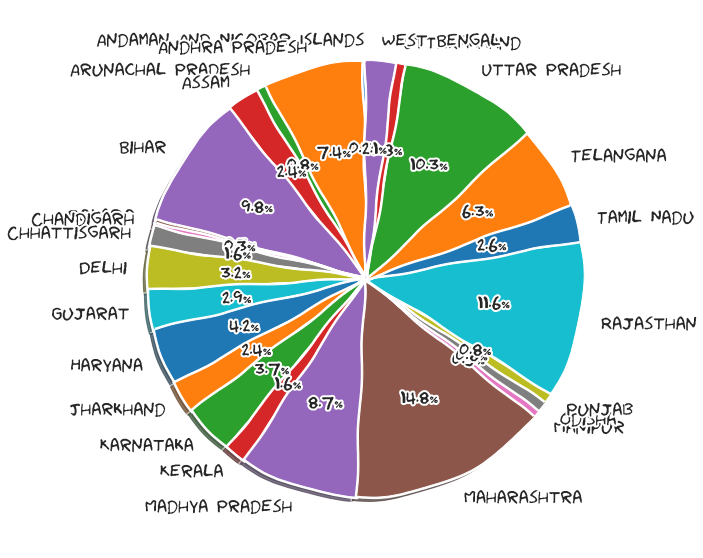

In [12]:
fig,axes=plt.subplots(figsize=(10,10))
data=df.groupby('home_state').count().iloc[:,1]
axes.pie(data,labels=data.index,autopct='%1.1f%%',shadow=True,startangle=90);

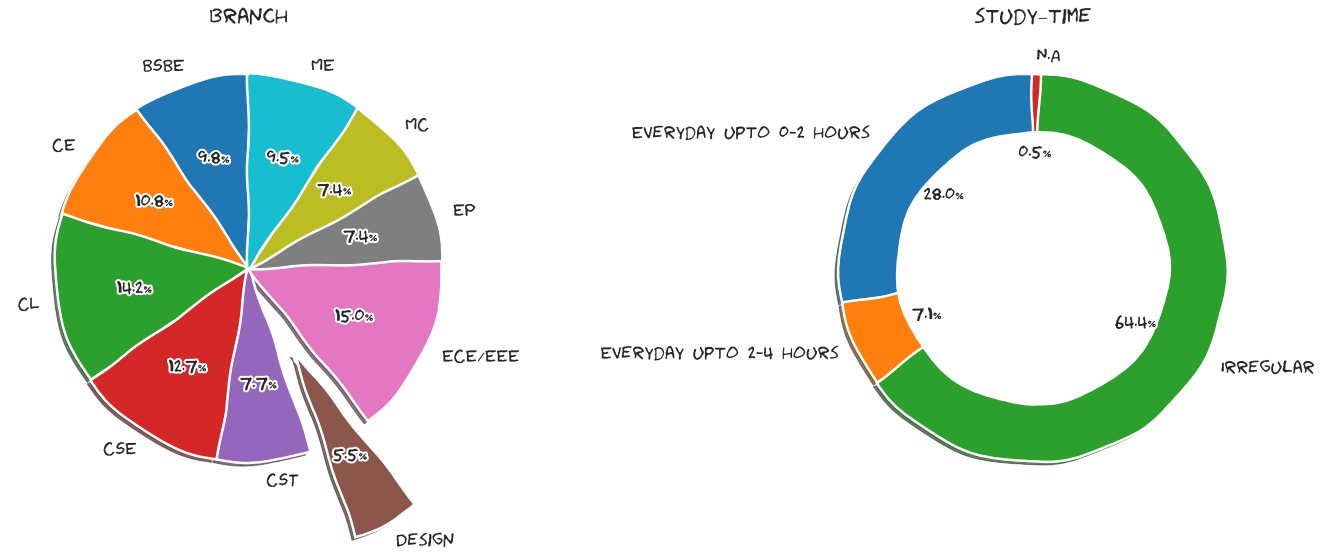

In [9]:
fig,axes=plt.subplots(ncols=2,figsize=(20,8)) 
# plt.tight_layout()

data=df.groupby('branch').count().iloc[:,1]
axes[0].pie(data,labels=data.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=(0,0,0,0,0,0.5,0,0,0,0)) 
axes[0].set_title('branch')

data=df.groupby('study_time').count().iloc[:,1] 
axes[1].pie(data,labels=data.index,autopct='%1.1f%%',shadow=True,startangle=90) 
axes[1].set_title('study_time')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()

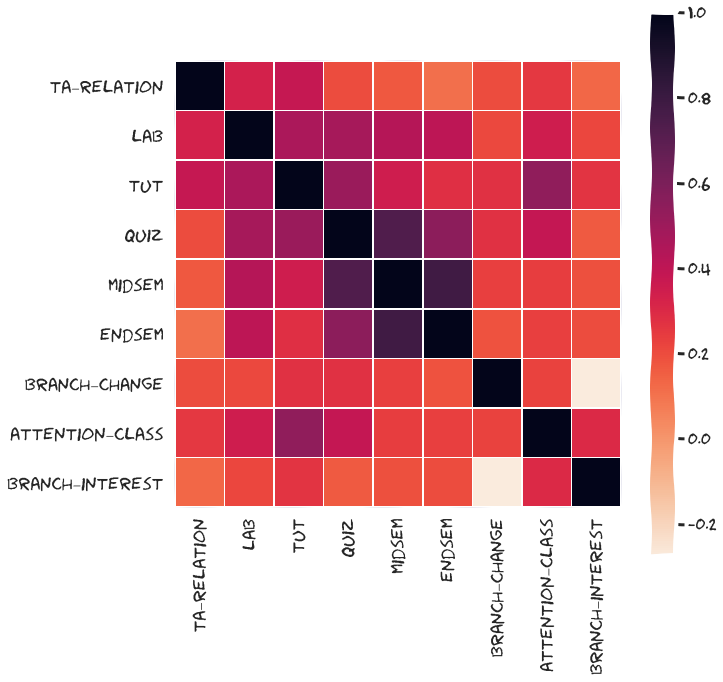

In [11]:
corr_columns=['ta_relation',
       'lab', 'tut', 'quiz', 'midsem', 'endsem', 'branch_change',
       'attention_class','branch_interest']
corr=df[corr_columns].corr()

plt.subplots(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5, cmap=sns.cm.rocket_r,square=True);

In [12]:
cult_cols=[f'cult_{club}' for club in cults]
tech_cols=[f'tech_{club}' for club in techs]
fest_cols=[f'fest_{fest}' for fest in fests]
addict_cols=[f'{adn}?!' for adn in addictions]

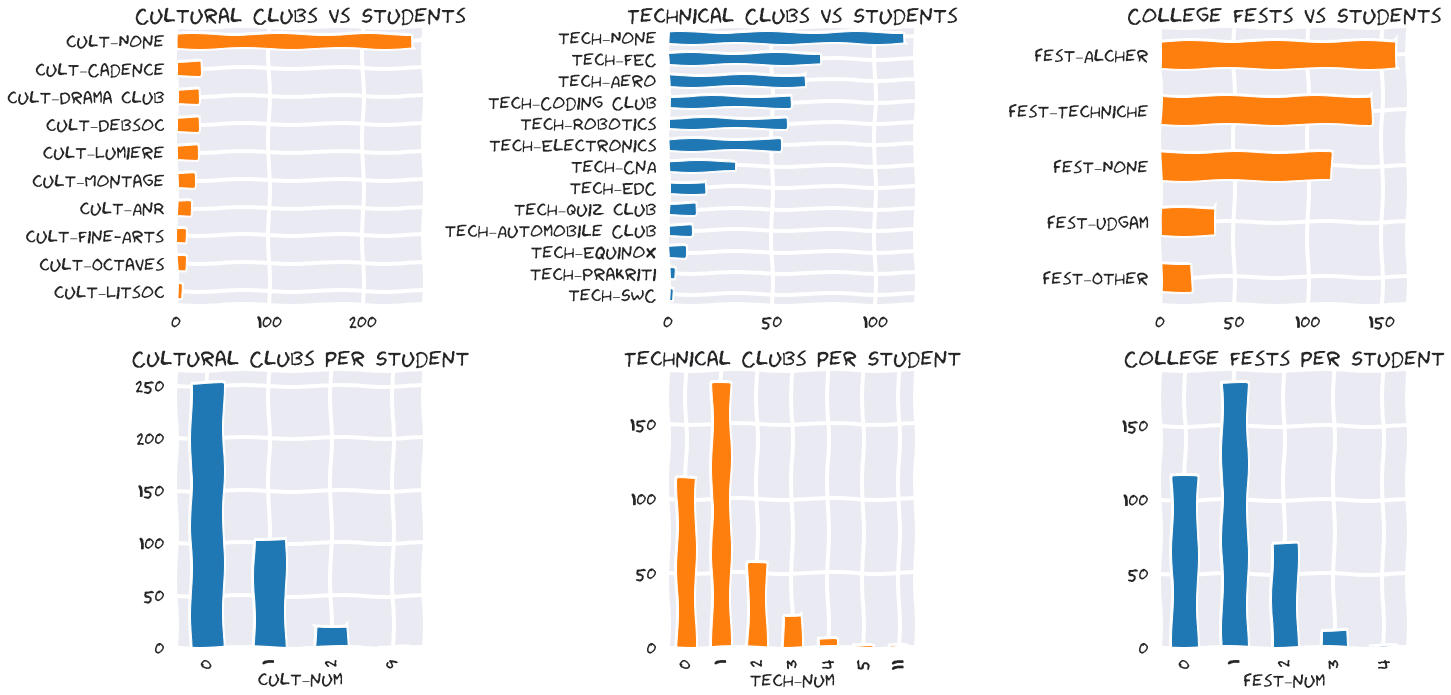

In [13]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
# plt.tight_layout()

tdf=df[cult_cols].sum().sort_values(ascending=True)
tdf.plot.barh(ax=ax[0,0], color='#ff7f0e')

df[tech_cols].sum().sort_values().plot.barh(ax=ax[0,1])
df[fest_cols].sum().sort_values().plot.barh(ax=ax[0,2], color='#ff7f0e')

df.groupby('cult_num').count().iloc[:,0].plot.bar(ax=ax[1,0])
df.groupby('tech_num').count().iloc[:,0].plot.bar(ax=ax[1,1],color='#ff7f0e')
df.groupby('fest_num').count().iloc[:,0].plot.bar(ax=ax[1,2])

ax[0,0].set_title('Cultural Clubs vs Students')
ax[0,1].set_title('Technical Clubs vs Students')
ax[0,2].set_title('College Fests vs Students')

ax[1,0].set_title('Cultural Clubs per Student')
ax[1,1].set_title('Technical Clubs per Student')
ax[1,2].set_title('College Fests per Student')


plt.tight_layout()

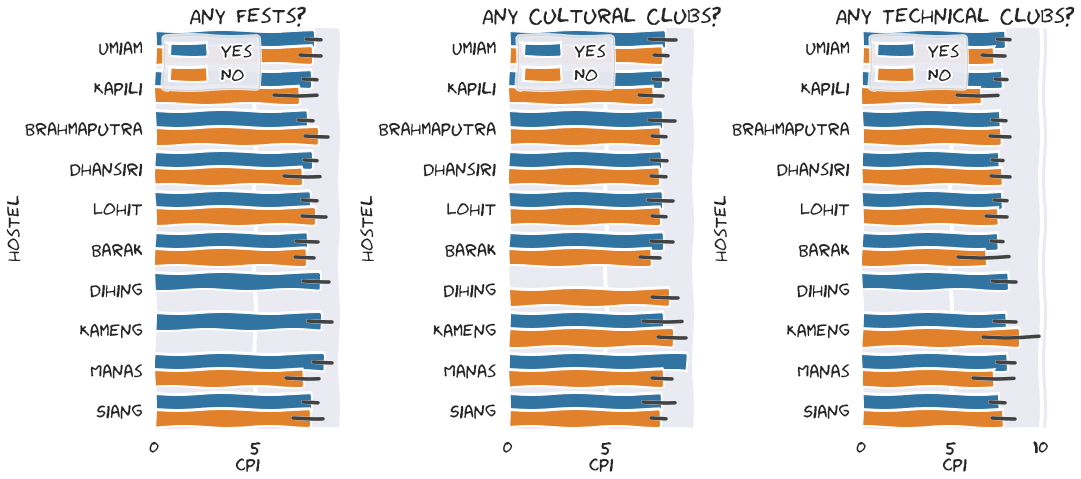

In [14]:
tdf=df.groupby('hostel')['cpi']
# sns.barplot(y=tdf.mean().index,x=tdf.mean().values)
fig,ax=plt.subplots(ncols=3,figsize=(15,7))
sns.barplot(y='hostel',x='cpi',data=df,hue='fest_None',ax=ax[0])
handles,_=ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles,labels=['Yes','No'], loc=2)
ax[0].set_title('Any Fests?')

sns.barplot(y='hostel',x='cpi',data=df,hue='cult_None',ax=ax[1])
handles,_=ax[1].get_legend_handles_labels()
ax[1].legend(handles=handles,labels=['Yes','No'], loc=2)
ax[1].set_title('Any Cultural Clubs?')

sns.barplot(y='hostel',x='cpi',data=df,hue='tech_None',ax=ax[2])
handles,_=ax[2].get_legend_handles_labels()
ax[2].legend(handles=handles,labels=['Yes','No'], loc=2)
ax[2].set_title('Any Technical Clubs?')

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of CPI; Freshmen Year IITG')

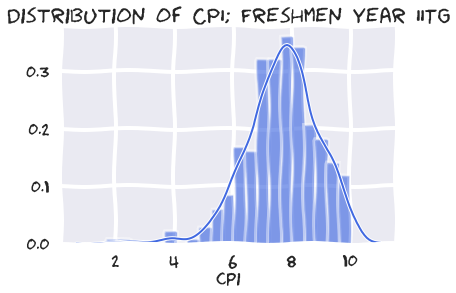

In [84]:
sns.distplot(df.cpi,color='royalblue');
plt.title('Distribution of CPI; Freshmen Year IITG')

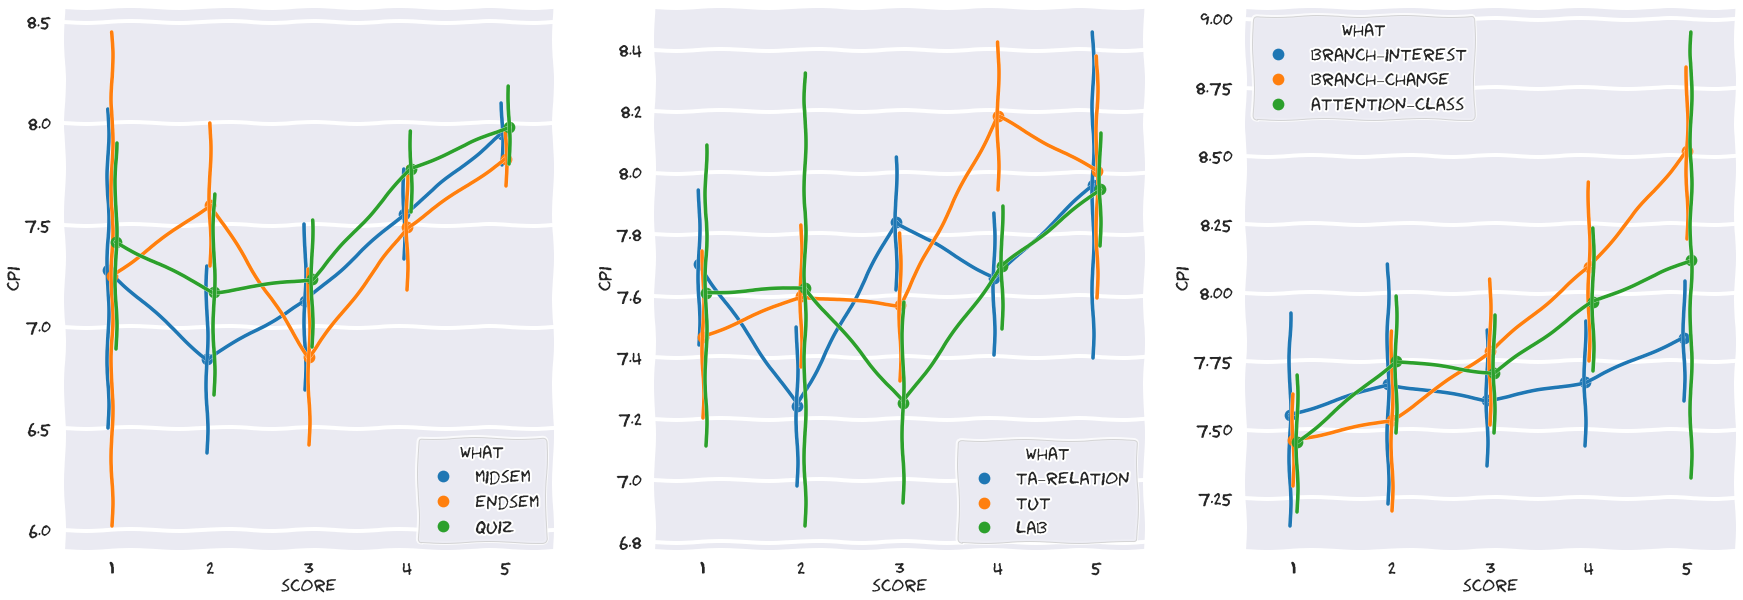

In [15]:
def superpointplot(feats,axes=None,transpose=False,order=None):
    df_list=[]
    for feat in feats:
      tdf=df[[feat,'cpi']]
      tdf.columns=['score','cpi']
      tdf['what']=feat
      df_list.append(tdf);
    tdf=pd.concat(df_list)
    if transpose: return sns.pointplot(data=tdf,x='cpi',y='score',hue='what',dodge=True,ax=axes,order=order)
    else: return sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True,ax=axes,order=order)

fig,axes=plt.subplots(ncols=3,figsize=(30,10))

df_list=[]
for feat in ['midsem','endsem','quiz']:
  tdf=df[[feat,'cpi']]
  tdf.columns=['score','cpi']
  tdf['what']=feat
  df_list.append(tdf);
tdf=pd.concat(df_list)
sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True,ax=axes[0])

df_list=[]
for feat in ['ta_relation','tut','lab']:
  tdf=df[[feat,'cpi']]
  tdf.columns=['score','cpi']
  tdf['what']=feat
  df_list.append(tdf);
tdf=pd.concat(df_list)
sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True, ax=axes[1])
# plt.legend(loc=0)

df_list=[]
for feat in ['branch_interest','branch_change','attention_class']:
  tdf=df[[feat,'cpi']]
  tdf.columns=['score','cpi']
  tdf['what']=feat
  df_list.append(tdf);
tdf=pd.concat(df_list)
sns.pointplot(data=tdf,y='cpi',x='score',hue='what',dodge=True, ax=axes[2])

Text(0.5, 1.0, 'Relationship Status')

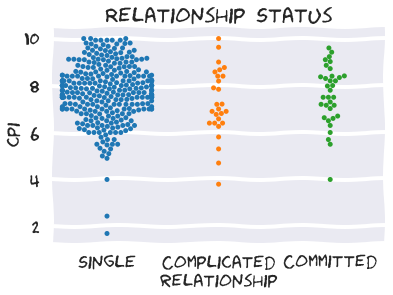

In [16]:
sns.swarmplot(y='cpi',x='relationship',data=df)
plt.title('Relationship Status')

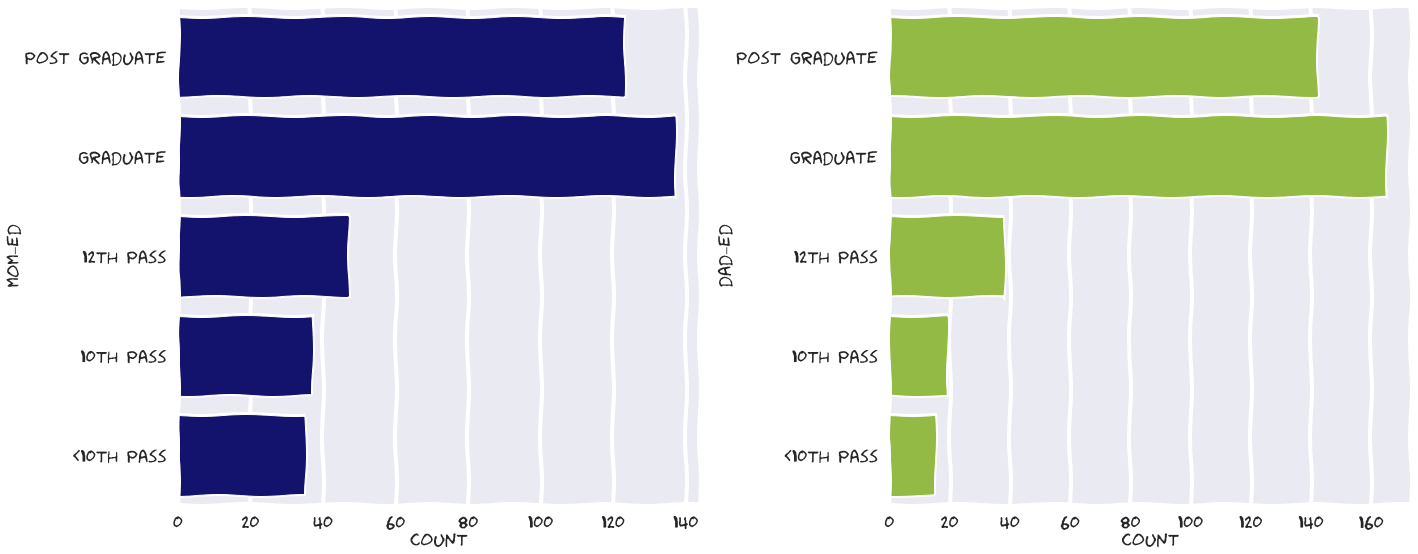

In [79]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
sns.countplot(data=df,y='mom_ed',saturation=0.7,ax=ax[0],color='navy',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])
sns.countplot(data=df,y='dad_ed',ax=ax[1],color='yellowgreen',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])
plt.tight_layout(pad=1)

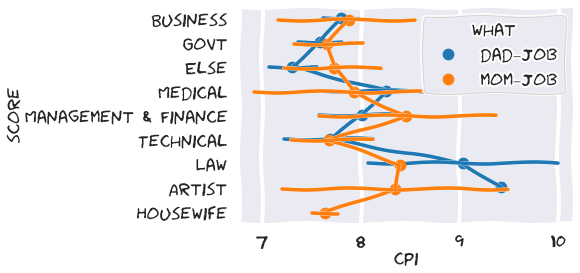

In [77]:
# sns.pointplot(data=df,y='mom_ed',x='cpi',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])
superpointplot(['dad_job','mom_job'],transpose=True,
#                order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1]
              )

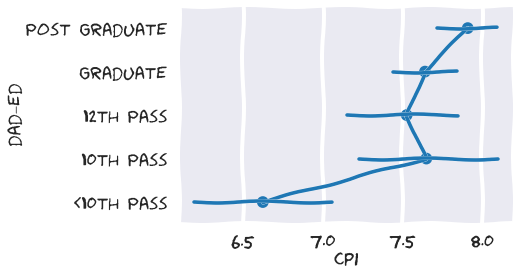

In [19]:
sns.pointplot(data=df,y='dad_ed',x='cpi',order=['<10th Pass','10th Pass','12th Pass','Graduate','Post Graduate'][::-1])

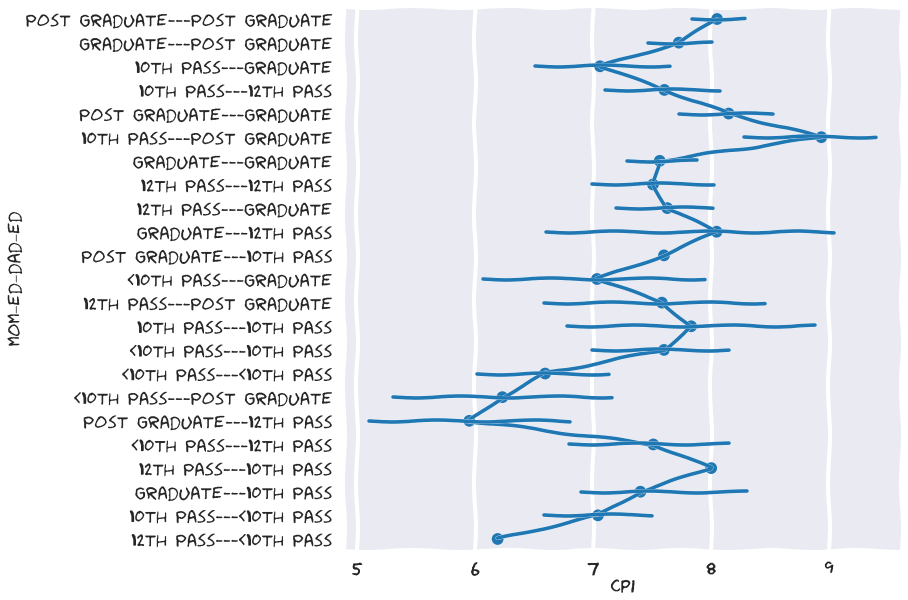

In [20]:
fig,ax=plt.subplots(figsize=(10,10))
sns.pointplot(data=df,y='mom_ed_dad_ed',x='cpi',ax=ax)

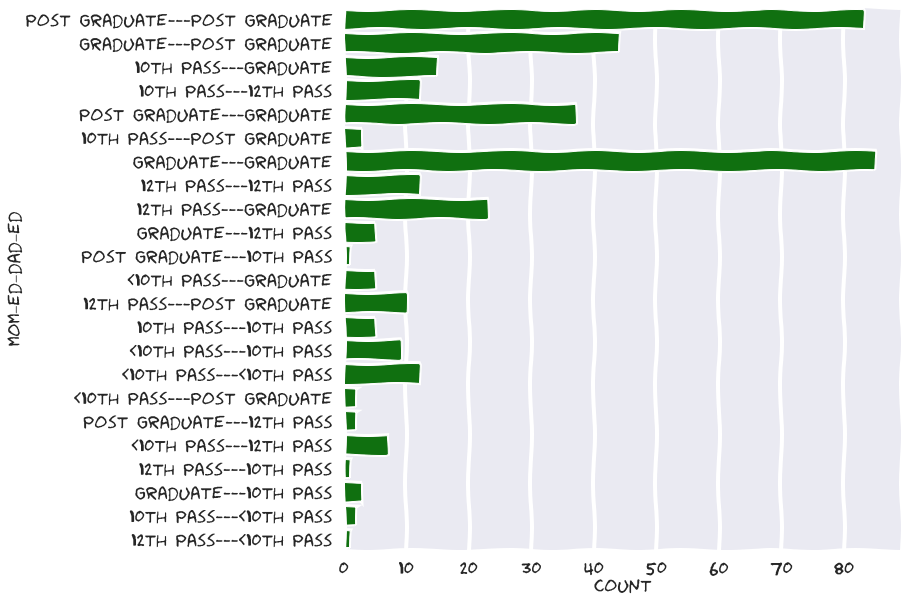

In [21]:
fig,ax=plt.subplots(figsize=(10,10))
sns.countplot(data=df,y='mom_ed_dad_ed',ax=ax,color='green')

In [22]:
tdf=df.groupby('mom_ed_dad_ed').count().iloc[:,0].sort_values(ascending=False)
# tdf['Other']=tdf[tdf<10].sum()
# tdf=tdf[tdf>=10]
# tdf.plot.barh()
tdf[tdf<10].index
for col in tdf[tdf<10].index:
    df['mom_ed_dad_ed'][df.mom_ed_dad_ed==col]='Other'

In [23]:
df.mom_ed_dad_ed.unique()

array(['Post Graduate---Post Graduate', 'Graduate---Post Graduate',
       '10th Pass---Graduate', '10th Pass---12th Pass',
       'Post Graduate---Graduate', 'Other', 'Graduate---Graduate',
       '12th Pass---12th Pass', '12th Pass---Graduate',
       '12th Pass---Post Graduate', '<10th Pass---<10th Pass'],
      dtype=object)

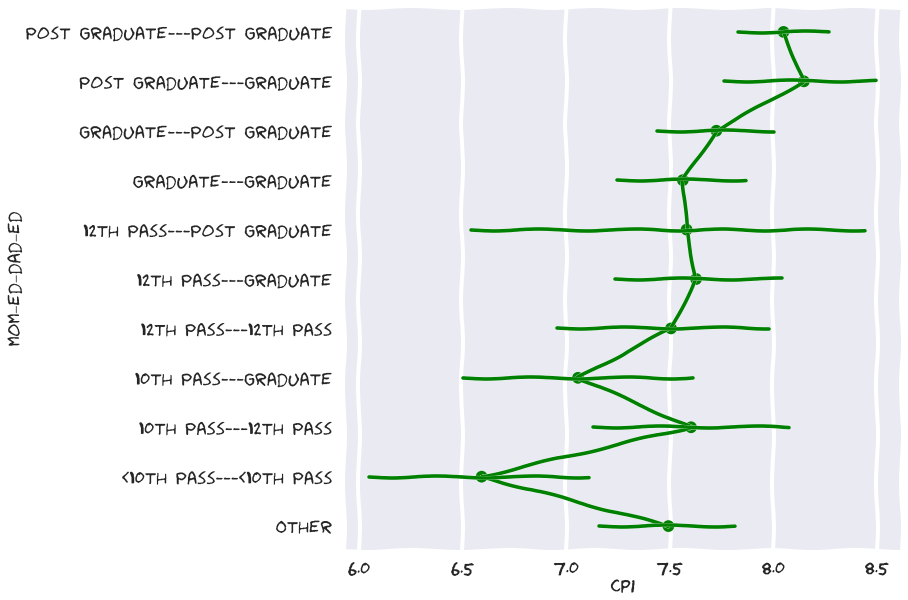

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
sns.pointplot(data=df,y='mom_ed_dad_ed',x='cpi',ax=ax,order=['Post Graduate---Post Graduate','Post Graduate---Graduate','Graduate---Post Graduate','Graduate---Graduate',
                                                            '12th Pass---Post Graduate','12th Pass---Graduate','12th Pass---12th Pass','10th Pass---Graduate','10th Pass---12th Pass',
                                                            '<10th Pass---<10th Pass','Other'],color='green')

In [25]:
def extracurri(cols):
    tdf=pd.Series()
    for col in cols:
        tdf[col]=df[df[col]==1]['cpi'].mean()
    return tdf

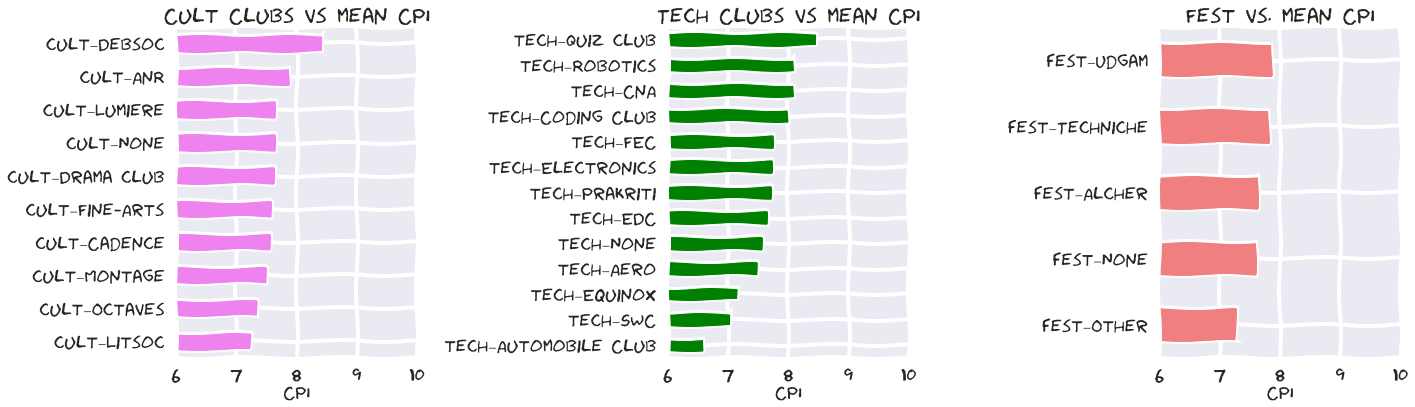

In [26]:
fig,ax=plt.subplots(figsize=(20,6),ncols=3)

tdf=extracurri(cult_cols)
tdf.sort_values().plot.barh(ax=ax[0],color='violet')
ax[0].set_xlim(6,10)
ax[0].set_title('Cult Clubs vs mean CPI')

tdf=extracurri(tech_cols)
tdf.sort_values().plot.barh(ax=ax[1],color='green')
ax[1].set_xlim(6,10)
ax[1].set_title('Tech Clubs vs mean CPI')

tdf=extracurri(fest_cols)
tdf.sort_values().plot.barh(ax=ax[2],color='lightcoral')
ax[2].set_xlim(6,10)
ax[2].set_title('Fest vs. mean CPI')

for i in range(3):
    ax[i].set_xlabel('CPI')

# tdf=extracurri(tech_cols)
plt.tight_layout()

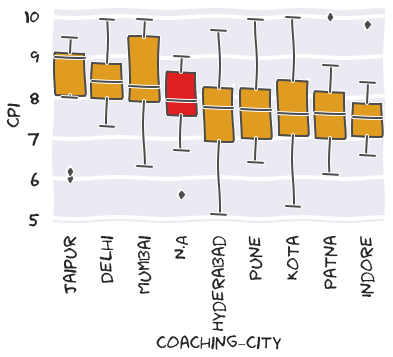

In [28]:
ordering=df.groupby('coaching_city')['cpi'].median().sort_values(ascending=False).index
ordering=[city for city in ordering if (df['coaching_city'].value_counts()[city]>10)]
hue_ordering=['orange']*9
hue_ordering[3]='red'
sns.boxplot(data=df,y='cpi',x='coaching_city',order=ordering,palette=hue_ordering);
plt.xticks(rotation=90);

Text(0.5, 0, 'Coaching Name (4 or more people)')

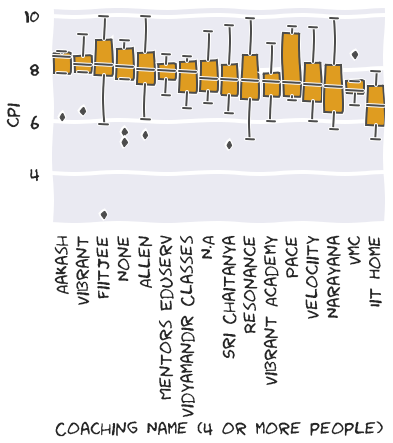

In [75]:
#had lot of clutter but only on low frequency classes
ordering=df.groupby('coaching_name')['cpi'].median().sort_values(ascending=False).index
ordering=[city for city in ordering if (df['coaching_name'].value_counts()[city]>3)]
hue_ordering=['orange']*9

# hue_ordering[3]='red'
sns.boxplot(data=df,y='cpi',x='coaching_name',order=ordering,palette=hue_ordering);
plt.xticks(rotation=90);
plt.xlabel('Coaching Name (4 or more people)')

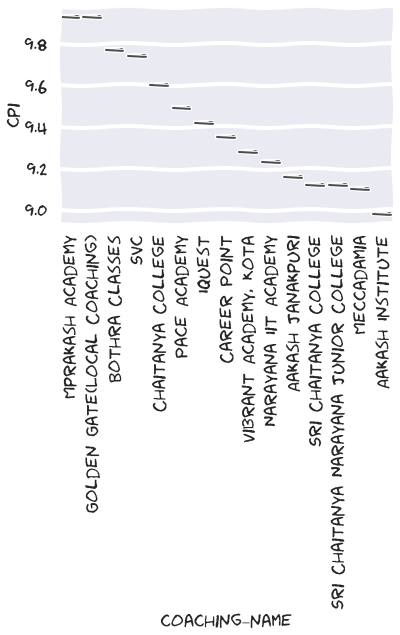

In [76]:
#had lot of clutter but only on low frequency classes
ordering=df.groupby('coaching_name')['cpi'].median().sort_values(ascending=False)[:15].index
# ordering=[city for city in ordering if (df['coaching_name'].value_counts()[city]>3)]
hue_ordering=['orange']*9
# hue_ordering[3]='red'
sns.boxplot(data=df,y='cpi',x='coaching_name',order=ordering,palette=hue_ordering);
plt.xticks(rotation=90);

In [31]:
with pd.option_context('display.max_rows',None): 
    display(df.coaching_name.value_counts())

Fiitjee                                  50
Allen                                    46
Resonance                                34
Sri Chaitanya                            14
None                                     12
Narayana                                 10
Vibrant Academy                           8
Vibrant                                   7
N.A                                       6
Vidyamandir Classes                       6
Pace                                      5
Mentors Eduserv                           4
Aakash                                    4
Velociity                                 4
Iit Home                                  4
Vmc                                       4
Motion                                    3
Kalpvriksha                               3
-                                         3
Nucleus Education                         3
Rao Iit                                   3
Iitians Pace                              3
Reso                            

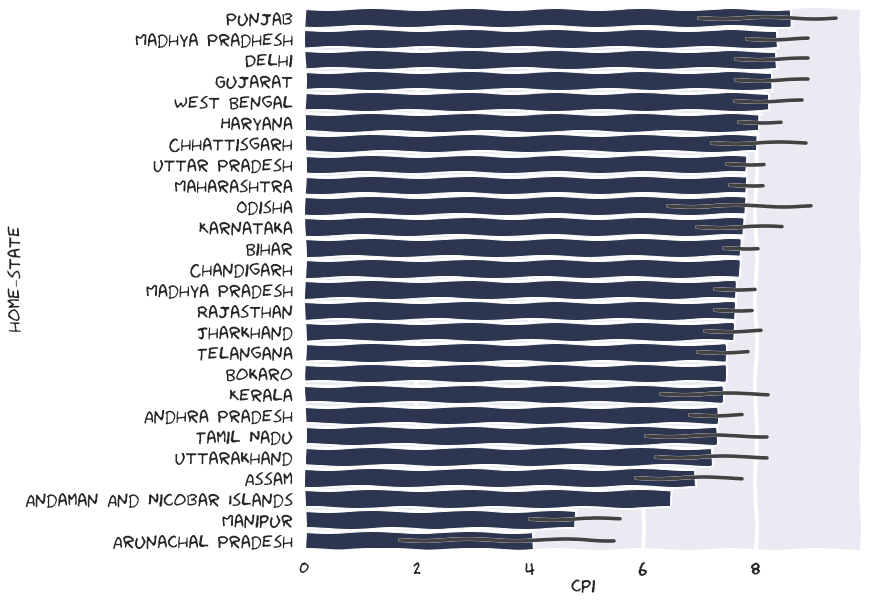

In [32]:
fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(data=df,y='home_state',x='cpi',ax=ax,color=blue2,order=df.groupby('home_state')['cpi'].mean().sort_values(ascending=False).index);

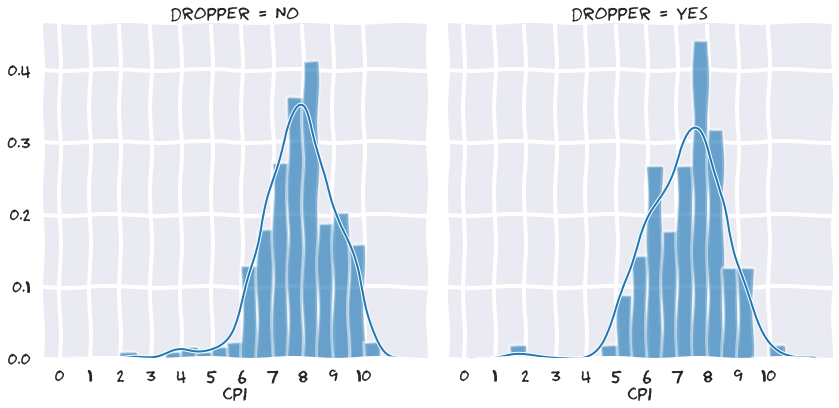

In [33]:
# fig,ax=plt.subplots(ncols=2,figsize=(10,10))
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='dropper',size=6).map(sns.distplot,'cpi',bins=bin_edges);
plt.xticks(range(10+1));

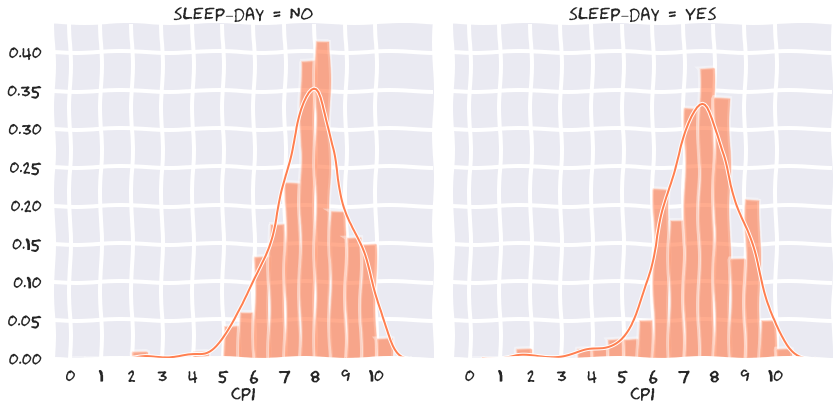

In [34]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='sleep_day',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='coral');
plt.xticks(range(10+1));

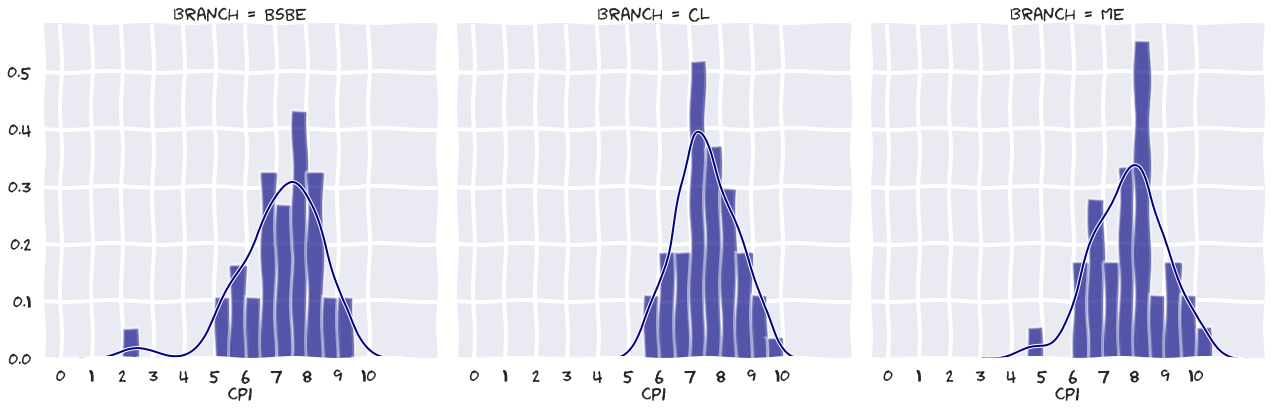

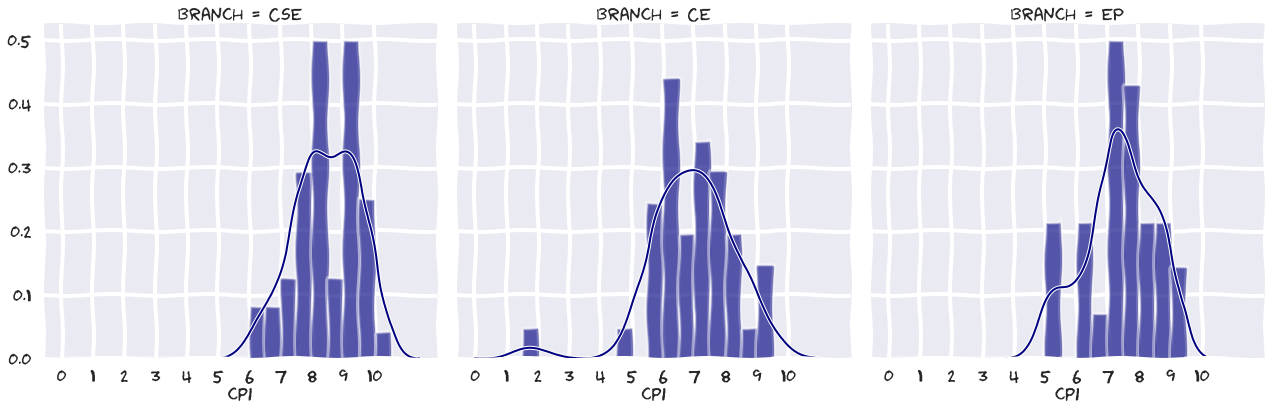

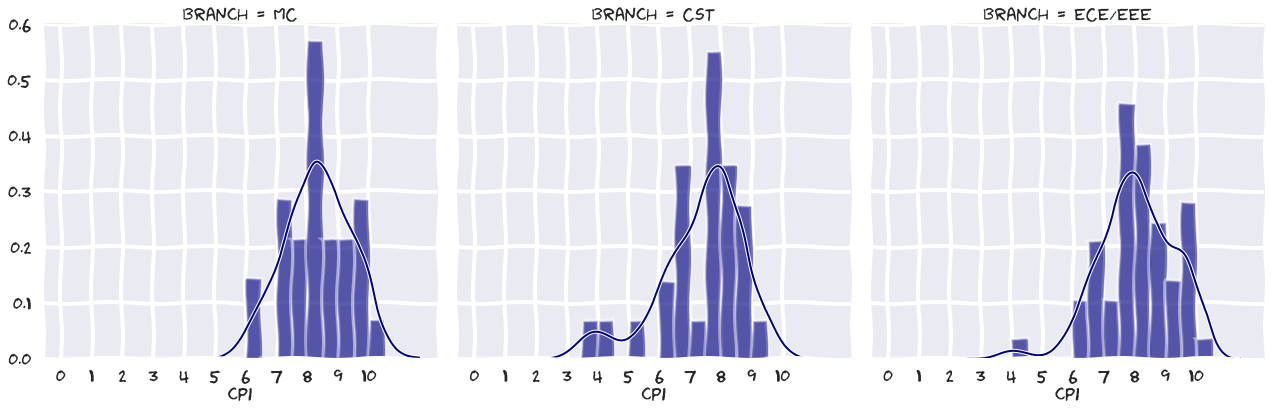

In [35]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.branch.isin(df.branch.unique()[:3])],col='branch',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='navy');
plt.xticks(range(10+1));

bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.branch.isin(df.branch.unique()[3:6])],col='branch',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='navy');
plt.xticks(range(10+1));

bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.branch.isin(df.branch.unique()[6:9])],col='branch',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='navy');
plt.xticks(range(10+1));

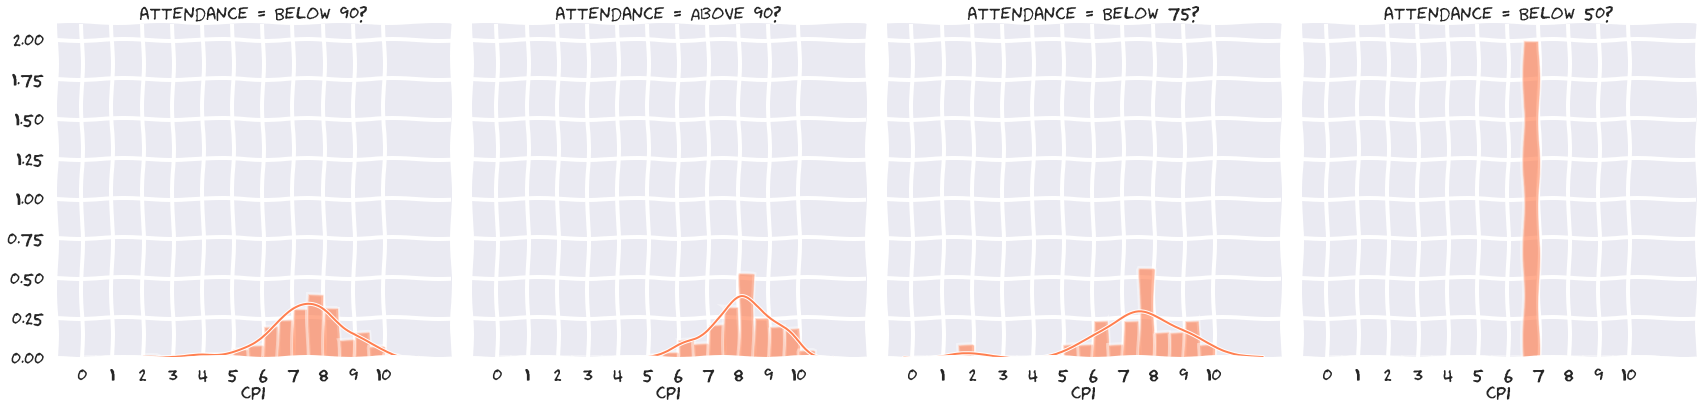

In [36]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='attendance',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='coral');
plt.xticks(range(10+1));

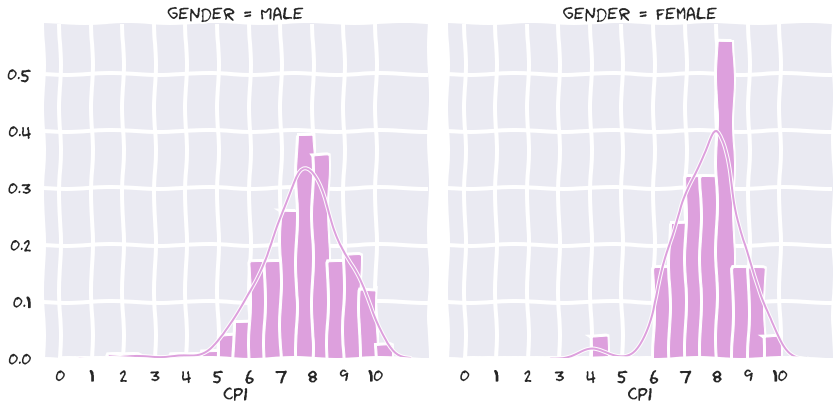

In [38]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='gender',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

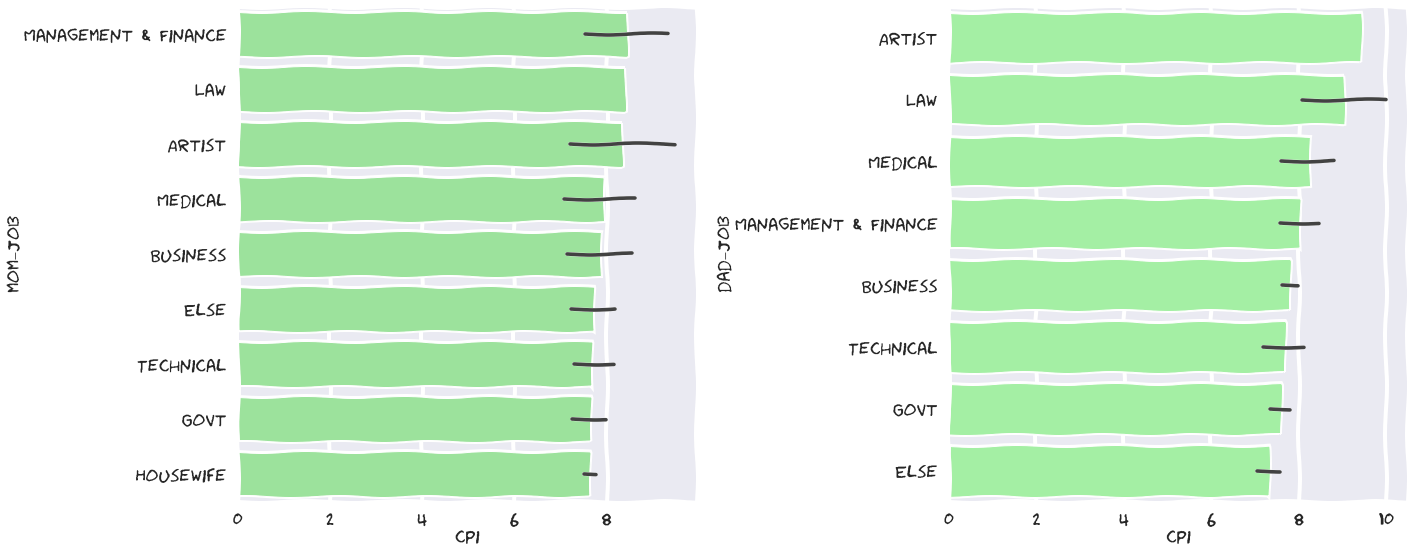

In [39]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
sns.barplot(data=df,y='mom_job',x='cpi',order=df.groupby('mom_job').cpi.mean().sort_values(ascending=False).index,ax=ax[0],color='lightgreen');
sns.barplot(data=df,y='dad_job',x='cpi',order=df.groupby('dad_job').cpi.mean().sort_values(ascending=False).index,ax=ax[1],color='palegreen');
plt.tight_layout()

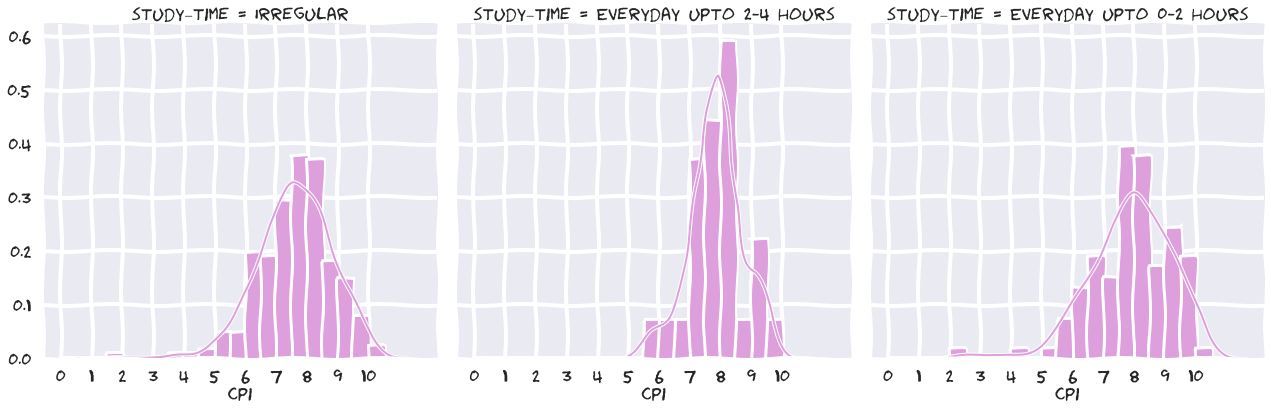

In [40]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df[df.study_time!='N.A'],col='study_time',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

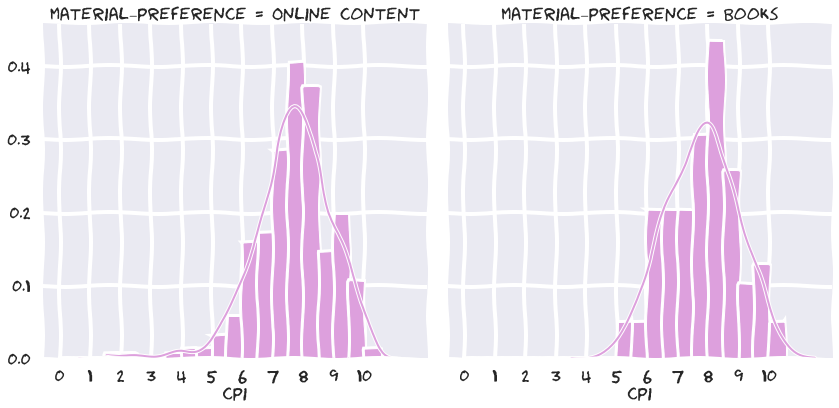

In [41]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='material_preference',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

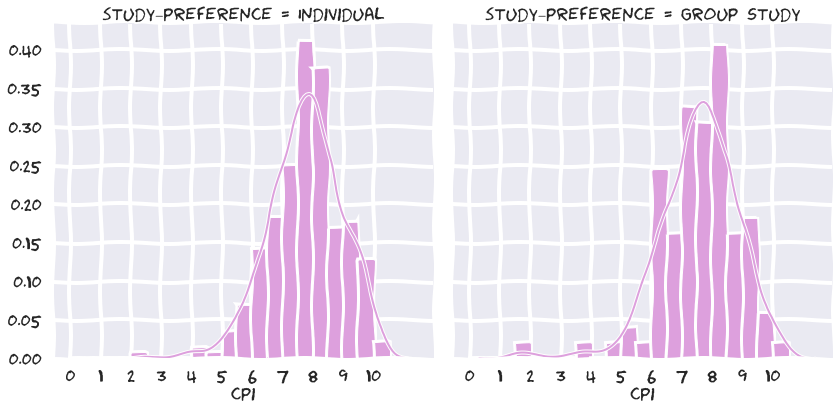

In [42]:
bin_edges=np.arange(0,10+1,0.5)
sns.FacetGrid(data=df,col='study_preference',size=6).map(sns.distplot,'cpi',bins=bin_edges,color='plum',hist_kws={'alpha':1});
plt.xticks(range(10+1));

In [13]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder=LabelEncoder()
cats=['gender', 'branch', 'dropper', 'tenth_board', 'twelvth_board',
       'coaching', 'coaching_city', 'coaching_name', 'home_state', 'home_city',
       'fam_size', 'mom_ed', 'dad_ed', 'mom_job', 'dad_job', 'study_time',
       'tech_clubs', 'cult_clubs', 'fest', 'hostel', 'intra_hostel', 'ed_loan',
       'time_outside', 'attendance', 'relationship', 'tv_time', 'library',
       'sleep_time', 'sleep_duration', 'sleep_day', 'addiction', 'study_preference', 'material_preference','core', 'mom_ed_dad_ed']

In [15]:
df_enc=df
for col in cats:
    df_enc[col]=pd.Series(encoder.fit_transform(df[col]),index=df[col].index)

In [16]:
df_enc

gender  branch  dropper  tenth_board  twelvth_board  coaching  \
1         1       0        0            0              0         0   
2         1       0        0            0              2         1   
3         1       2        0            0              0         1   
4         1       2        0            0              0         1   
5         1       9        0            0              0         1   
..      ...     ...      ...          ...            ...       ...   
376       1       8        1            0              0         1   
377       1       9        0            0              0         1   
378       1       7        0            0              0         1   
379       1       1        0            0              0         1   
380       1       0        1            0              0         0   

     coaching_city  coaching_name  home_state  home_city  fam_size  mom_ed  \
1               56             73          19         36         8       4   
2               37              8          14        116         5       3   
3               64            146           4        163         3       0   
4               64            146           4        163         3       0   
5               49            128          15        197         4       0   
..             ...            ...         ...        ...       ...     ...   
376             66             28           9        151         4       2   
377             49            131          22         61         4       2   
378             21             91           8         50         3       0   
379             48              8          19        110         3       1   
380             62             82           3        136         3       1   

     dad_ed  mom_job  dad_job  study_time  tech_clubs  cult_clubs  fest  \
1         4        4        1           2          18           7     5   
2         4        4        3           1           7          18     3   
3         3        4        1           3           6          18     5   
4         3        4        1           3           6          18     5   
5         1        4        2           0          48          18     3   
..      ...      ...      ...         ...         ...         ...   ...   
376       0        4        2           2          33          18     3   
377       1        4        2           0           5          18     3   
378       1        4        2           2          45          18     3   
379       1        4        1           2          45          10     3   
380       1        7        2           2          33          19     3   

     hostel  intra_hostel  ed_loan  time_outside  attendance  relationship  \
1         9            53        0            15           3             2   
2         5            48        0             6           0             2   
3         1            32        1             3           3             2   
4         1            32        1             3           3             2   
5         1            20        1             5           0             2   
..      ...           ...      ...           ...         ...           ...   
376       0             9        1             5           2             2   
377       0            32        0            17           3             1   
378       0            41        1             9           3             0   
379       0            32        1             5           2             2   
380       0            21        0             3           3             2   

     tv_time  library  sleep_time  sleep_duration  sleep_day  addiction  \
1          6        0           4               2          0          3   
2          4        2           4               1          0          3   
3          4        2           4               2          0          3   
4          4        2           4               2          0          3   
5          4  

In [17]:
import plotly
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr

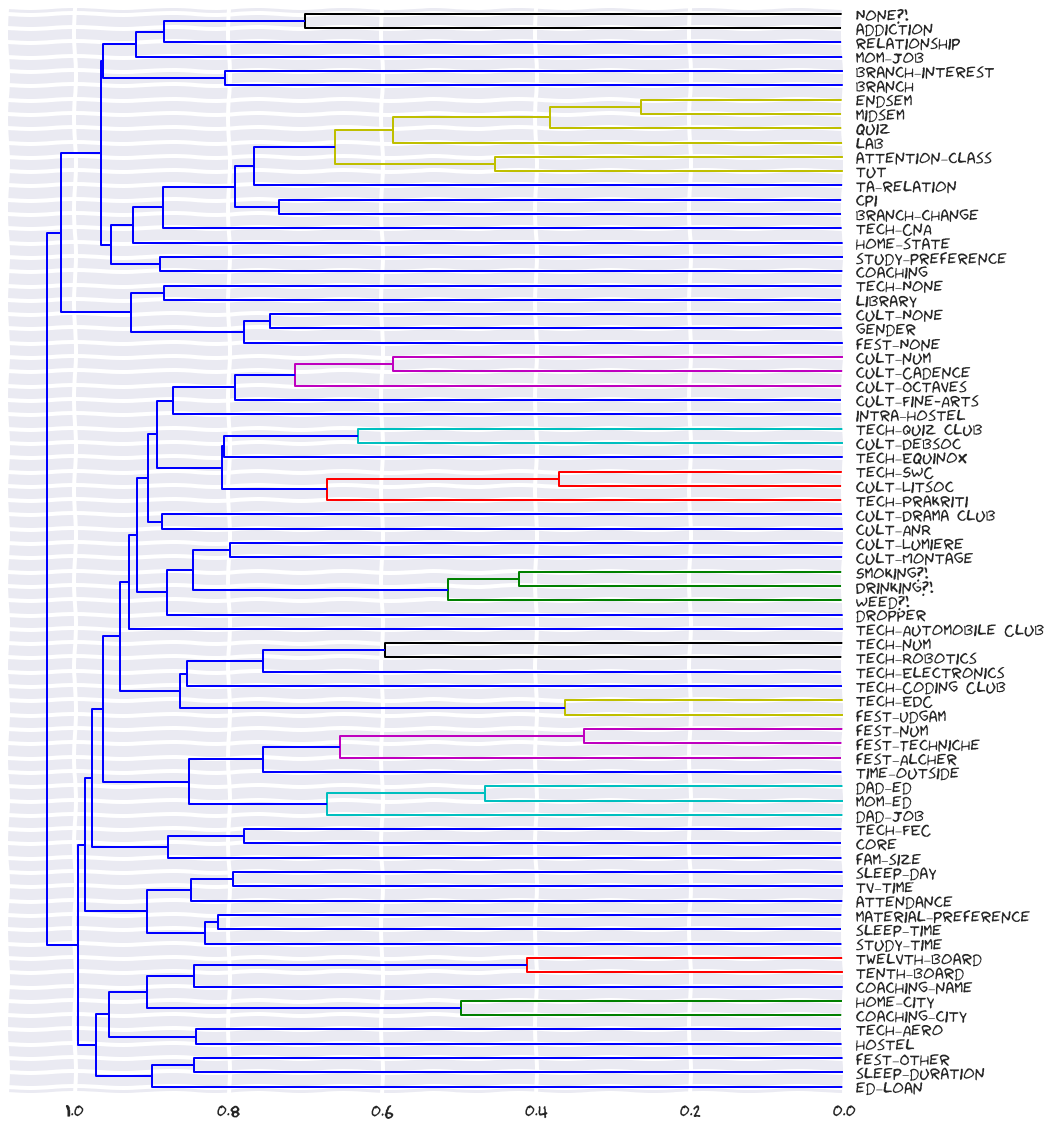

In [18]:
df_enc.drop(['fest','cult_clubs','tech_clubs','mom_ed_dad_ed'],axis=1,inplace=True)

corr=np.round(spearmanr(df_enc).correlation,4)
corr_condensed=hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed,method='average')
fig=plt.figure(figsize=(15,20))
dendrogram=hc.dendrogram(z,labels=df_enc.columns,orientation='left',leaf_font_size=16)

In [19]:
X,y=df_enc.drop('cpi',axis=1),df['cpi']
X_train,X_vld=X[:200],X[200:]
y_train,y_vld=y[:200],y[200:]

In [26]:
train_data=lgb.Dataset(X_train,label=y_train,free_raw_data=False)
valid_data=lgb.Dataset(X_vld, label=y_vld,free_raw_data=False)
whole_data=lgb.Dataset(X,label=y,free_raw_data=False)

In [29]:
# params={}
# params['learning_rate']=0.01
# params['objective']='regression'
# params['metric']='rmse'
# params['l2']=0.4
# params['metric_freq']=5
# params['feature_fraction']=0.7
# params['is_training_metric']=True
# params['verbose']=1

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'is_training_metric': True,
    'metric_freq': 5,
    'num_leaves': 31,
    'learning_rate': 0.02,
    'lambda_l2': 0.0042,
    'feature_fraction': 0.7,
    'bagging_fraction': 1,
    'bagging_freq': 5,
    'verbose': 1,
    'device' : 'cpu',
    'gpu_platform_id' : 0,
    'gpu_device_id' : 0
}

cats=['branch', 'dropper', 'tenth_board', 
    'coaching_city', 'coaching_name', 'home_state', 'home_city',
    'dad_ed', 'dad_job',
    'time_outside', 'attendance',
    'tv_time', 'library', 'sleep_time',
    'material_preference', 'core']

cpi_model=lgb.train(
    params,
    train_data,
    valid_sets=[train_data,valid_data],
    early_stopping_rounds=100,
    num_boost_round=10000,
    categorical_feature=cats
)

[1]	training's rmse: 1.12839	valid_1's rmse: 1.35071
Training until validation scores don't improve for 100 rounds
[2]	training's rmse: 1.12345	valid_1's rmse: 1.34874
[3]	training's rmse: 1.1183	valid_1's rmse: 1.34619
[4]	training's rmse: 1.11298	valid_1's rmse: 1.34368
[5]	training's rmse: 1.10841	valid_1's rmse: 1.34067
[6]	training's rmse: 1.10353	valid_1's rmse: 1.33862
[7]	training's rmse: 1.09982	valid_1's rmse: 1.33692
[8]	training's rmse: 1.09548	valid_1's rmse: 1.33491
[9]	training's rmse: 1.09081	valid_1's rmse: 1.33224
[10]	training's rmse: 1.08682	valid_1's rmse: 1.32991
[11]	training's rmse: 1.08298	valid_1's rmse: 1.32819
[12]	training's rmse: 1.07867	valid_1's rmse: 1.32602
[13]	training's rmse: 1.07509	valid_1's rmse: 1.32391
[14]	training's rmse: 1.07073	valid_1's rmse: 1.32247
[15]	training's rmse: 1.06713	valid_1's rmse: 1.32105
[16]	training's rmse: 1.06308	valid_1's rmse: 1.31927
[17]	training's rmse: 1.05946	valid_1's rmse: 1.31804
[18]	training's rmse: 1.05601	

[168]	training's rmse: 0.749922	valid_1's rmse: 1.27786
[169]	training's rmse: 0.748671	valid_1's rmse: 1.27829
[170]	training's rmse: 0.747034	valid_1's rmse: 1.27876
[171]	training's rmse: 0.745995	valid_1's rmse: 1.27901
[172]	training's rmse: 0.744319	valid_1's rmse: 1.27937
[173]	training's rmse: 0.743167	valid_1's rmse: 1.27906
[174]	training's rmse: 0.742175	valid_1's rmse: 1.27933
[175]	training's rmse: 0.741206	valid_1's rmse: 1.27951
[176]	training's rmse: 0.73987	valid_1's rmse: 1.27919
[177]	training's rmse: 0.738595	valid_1's rmse: 1.27961
[178]	training's rmse: 0.737328	valid_1's rmse: 1.27989
[179]	training's rmse: 0.73623	valid_1's rmse: 1.27904
[180]	training's rmse: 0.734692	valid_1's rmse: 1.27928
[181]	training's rmse: 0.733313	valid_1's rmse: 1.27935
[182]	training's rmse: 0.732156	valid_1's rmse: 1.27983
[183]	training's rmse: 0.730491	valid_1's rmse: 1.28011
[184]	training's rmse: 0.729644	valid_1's rmse: 1.28022
[185]	training's rmse: 0.728523	valid_1's rmse: 1.

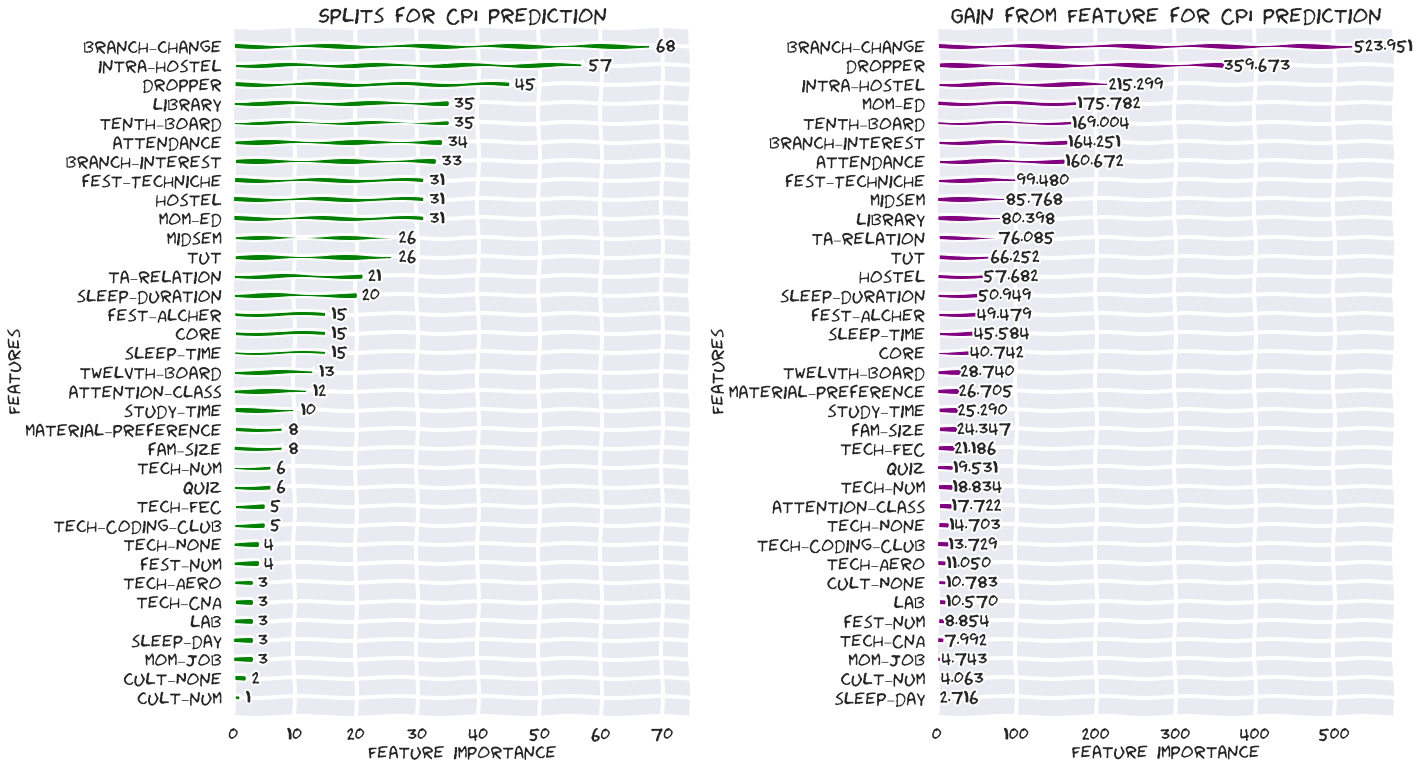

In [30]:
fig,ax=plt.subplots(ncols=2,figsize=(20,11))
lgb.plot_importance(cpi_model,ax=ax[0],importance_type='split',color='green');
ax[0].set_title('Splits for CPI prediction');

lgb.plot_importance(cpi_model,ax=ax[1],importance_type='gain',color='purple',alpha=1);
ax[1].set_title('Gain from Feature for CPI prediction');

plt.tight_layout();

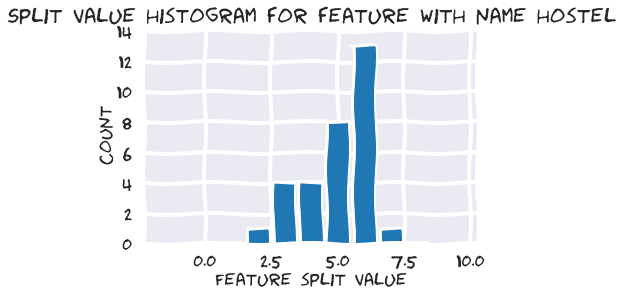

In [54]:
lgb.plot_split_value_histogram(cpi_model,'hostel',bins=np.arange(0-0.5,df_enc.hostel.max()+0.5,1))

In [55]:
df_enc.drop(['cpi'],axis=1).columns[cpi_model.feature_importance()==0]

Index(['gender', 'branch', 'coaching', 'coaching_city', 'coaching_name',
       'home_state', 'home_city', 'dad_ed', 'dad_job', 'ed_loan',
       'time_outside', 'relationship', 'tv_time', 'addiction', 'endsem',
       'study_preference', 'fest_Udgam', 'fest_Other', 'fest_None',
       'cult_Debsoc', 'cult_AnR', 'cult_Cadence', 'cult_Litsoc',
       'cult_Montage', 'cult_Lumiere', 'cult_Octaves', 'cult_Drama club',
       'cult_Fine-Arts', 'tech_Quiz club', 'tech_Robotics', 'tech_Electronics',
       'tech_EDC', 'tech_Equinox', 'tech_SWC', 'tech_Automobile Club',
       'tech_Prakriti', 'Drinking?!', 'Smoking?!', 'Weed?!', 'None?!'],
      dtype='object')

In [34]:
import random
train_index=random.sample(range(0,379),200)

In [35]:
val_index=np.array(list(set(range(1,379)) - set(train_index)))


In [36]:
df_enc.reset_index(inplace=True,drop=True)
# df_enc.drop(['level_0','index'],axis=1,inplace=True)
X_train=df_enc.iloc[train_index].drop(['cpi'],axis=1)
X_valid=df_enc.iloc[val_index].drop('cpi',axis=1)

y_train=df_enc.cpi[train_index]
y_valid=df_enc.cpi[val_index]

train_df=lgb.Dataset(X_train,label=y_train,free_raw_data=False)
valid_df=lgb.Dataset(X_valid,label=y_valid,free_raw_data=False)

In [37]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'is_training_metric': True,
    'metric_freq': 5,
#     'num_leaves': 64,
    'learning_rate': 0.005,
    'lambda_l2': 0.01,
    'feature_fraction': 0.74,
    'bagging_fraction': 0.86,
    'bagging_freq': 1,
    'verbose': 1,
#     'min_child_weight':20,
}

cats=['gender', 'dropper',
       'twelvth_board', 'coaching_city',
       'home_state', 'home_city', 'fam_size', 'mom_job',
       'dad_job', 'ed_loan','mom_ed',
       'time_outside', 'attendance','tv_time',
        'sleep_duration', 'sleep_day', 'addiction',
       'material_preference']

cpi_model_1=lgb.train(
    params,
    train_df,
    valid_sets=[train_df,valid_df],
    early_stopping_rounds=50,
    num_boost_round=10000,
    categorical_feature=cats
)

[1]	training's rmse: 1.16921	valid_1's rmse: 1.29608
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.16726	valid_1's rmse: 1.29508
[3]	training's rmse: 1.16545	valid_1's rmse: 1.29397
[4]	training's rmse: 1.16361	valid_1's rmse: 1.29321
[5]	training's rmse: 1.16169	valid_1's rmse: 1.29187
[6]	training's rmse: 1.16008	valid_1's rmse: 1.29104
[7]	training's rmse: 1.15843	valid_1's rmse: 1.29047
[8]	training's rmse: 1.15705	valid_1's rmse: 1.29006
[9]	training's rmse: 1.15522	valid_1's rmse: 1.28905
[10]	training's rmse: 1.15304	valid_1's rmse: 1.2876
[11]	training's rmse: 1.15123	valid_1's rmse: 1.28619
[12]	training's rmse: 1.14984	valid_1's rmse: 1.28569
[13]	training's rmse: 1.14831	valid_1's rmse: 1.28452
[14]	training's rmse: 1.14688	valid_1's rmse: 1.28353
[15]	training's rmse: 1.14554	valid_1's rmse: 1.28336
[16]	training's rmse: 1.14405	valid_1's rmse: 1.28252
[17]	training's rmse: 1.14222	valid_1's rmse: 1.28155
[18]	training's rmse: 1.14049	v

[153]	training's rmse: 0.969807	valid_1's rmse: 1.20331
[154]	training's rmse: 0.968877	valid_1's rmse: 1.20308
[155]	training's rmse: 0.967696	valid_1's rmse: 1.20245
[156]	training's rmse: 0.966824	valid_1's rmse: 1.2021
[157]	training's rmse: 0.965881	valid_1's rmse: 1.20206
[158]	training's rmse: 0.964917	valid_1's rmse: 1.20162
[159]	training's rmse: 0.963873	valid_1's rmse: 1.20115
[160]	training's rmse: 0.963041	valid_1's rmse: 1.20103
[161]	training's rmse: 0.961792	valid_1's rmse: 1.20051
[162]	training's rmse: 0.960651	valid_1's rmse: 1.19996
[163]	training's rmse: 0.959783	valid_1's rmse: 1.19943
[164]	training's rmse: 0.958993	valid_1's rmse: 1.19924
[165]	training's rmse: 0.958098	valid_1's rmse: 1.19919
[166]	training's rmse: 0.957294	valid_1's rmse: 1.19918
[167]	training's rmse: 0.956366	valid_1's rmse: 1.19908
[168]	training's rmse: 0.955571	valid_1's rmse: 1.19873
[169]	training's rmse: 0.954804	valid_1's rmse: 1.19849
[170]	training's rmse: 0.953984	valid_1's rmse: 1

[315]	training's rmse: 0.852353	valid_1's rmse: 1.16677
[316]	training's rmse: 0.851833	valid_1's rmse: 1.16654
[317]	training's rmse: 0.851276	valid_1's rmse: 1.16647
[318]	training's rmse: 0.850901	valid_1's rmse: 1.16626
[319]	training's rmse: 0.850432	valid_1's rmse: 1.16611
[320]	training's rmse: 0.849905	valid_1's rmse: 1.16611
[321]	training's rmse: 0.849183	valid_1's rmse: 1.16602
[322]	training's rmse: 0.848531	valid_1's rmse: 1.1658
[323]	training's rmse: 0.847928	valid_1's rmse: 1.16562
[324]	training's rmse: 0.84757	valid_1's rmse: 1.16547
[325]	training's rmse: 0.847013	valid_1's rmse: 1.16543
[326]	training's rmse: 0.846462	valid_1's rmse: 1.16532
[327]	training's rmse: 0.846059	valid_1's rmse: 1.16545
[328]	training's rmse: 0.845565	valid_1's rmse: 1.16532
[329]	training's rmse: 0.845107	valid_1's rmse: 1.16515
[330]	training's rmse: 0.84467	valid_1's rmse: 1.16511
[331]	training's rmse: 0.844153	valid_1's rmse: 1.16506
[332]	training's rmse: 0.843677	valid_1's rmse: 1.1

[467]	training's rmse: 0.783069	valid_1's rmse: 1.15893
[468]	training's rmse: 0.782616	valid_1's rmse: 1.15895
[469]	training's rmse: 0.78232	valid_1's rmse: 1.15877
[470]	training's rmse: 0.782	valid_1's rmse: 1.15882
[471]	training's rmse: 0.781592	valid_1's rmse: 1.15879
[472]	training's rmse: 0.781245	valid_1's rmse: 1.15873
[473]	training's rmse: 0.780872	valid_1's rmse: 1.15882
[474]	training's rmse: 0.780454	valid_1's rmse: 1.15869
[475]	training's rmse: 0.780089	valid_1's rmse: 1.15862
[476]	training's rmse: 0.779609	valid_1's rmse: 1.15865
[477]	training's rmse: 0.779246	valid_1's rmse: 1.1588
[478]	training's rmse: 0.778811	valid_1's rmse: 1.15869
[479]	training's rmse: 0.778386	valid_1's rmse: 1.15861
[480]	training's rmse: 0.778024	valid_1's rmse: 1.1587
[481]	training's rmse: 0.777675	valid_1's rmse: 1.15872
[482]	training's rmse: 0.777331	valid_1's rmse: 1.15863
[483]	training's rmse: 0.776977	valid_1's rmse: 1.15876
Early stopping, best iteration is:
[433]	training's rm

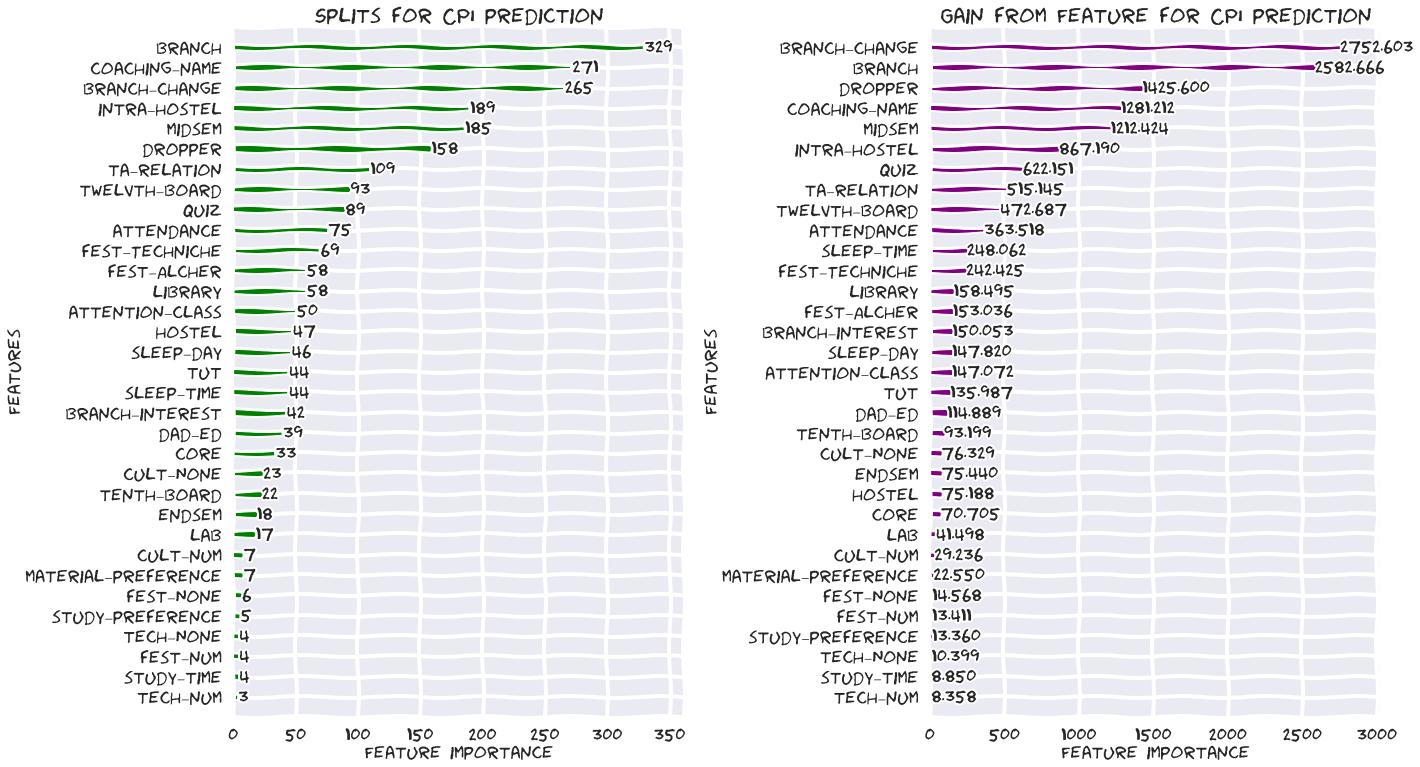

In [38]:
fig,ax=plt.subplots(ncols=2,figsize=(20,11))
lgb.plot_importance(cpi_model_1,ax=ax[0],importance_type='split',color='green');
ax[0].set_title('Splits for CPI prediction');

lgb.plot_importance(cpi_model_1,ax=ax[1],importance_type='gain',color='purple',alpha=1);
ax[1].set_title('Gain from Feature for CPI prediction');

plt.tight_layout();

In [39]:
# from eli5.permutation_importance import get_score_importances
from sklearn.metrics import mean_squared_error as rmse

def score(X, y):
    y_pred = cpi_model_1.predict(X)
    return rmse(y_pred,y, squared=False)

X_valid.reset_index(inplace=True,drop=True)
y_valid.reset_index(inplace=True,drop=True)
# base_score, score_decreases = get_score_importances(score, X_valid, y_valid)
# feature_importances = np.mean(score_decreases, axis=0)

base_score=score(X_valid,y_valid)
fi=pd.Series(index=X_valid.columns)
    
for col in X_valid.columns:
    X_bot=X_valid.copy()
    diff=[]
    curr=X_valid[col].values.copy()
    for _ in range(20):
        random.shuffle(curr)
        X_bot[col]=curr
        now_score=score(X_bot,y_valid)
        diff.append(now_score-base_score)
    fi[col]=np.array(diff).mean()

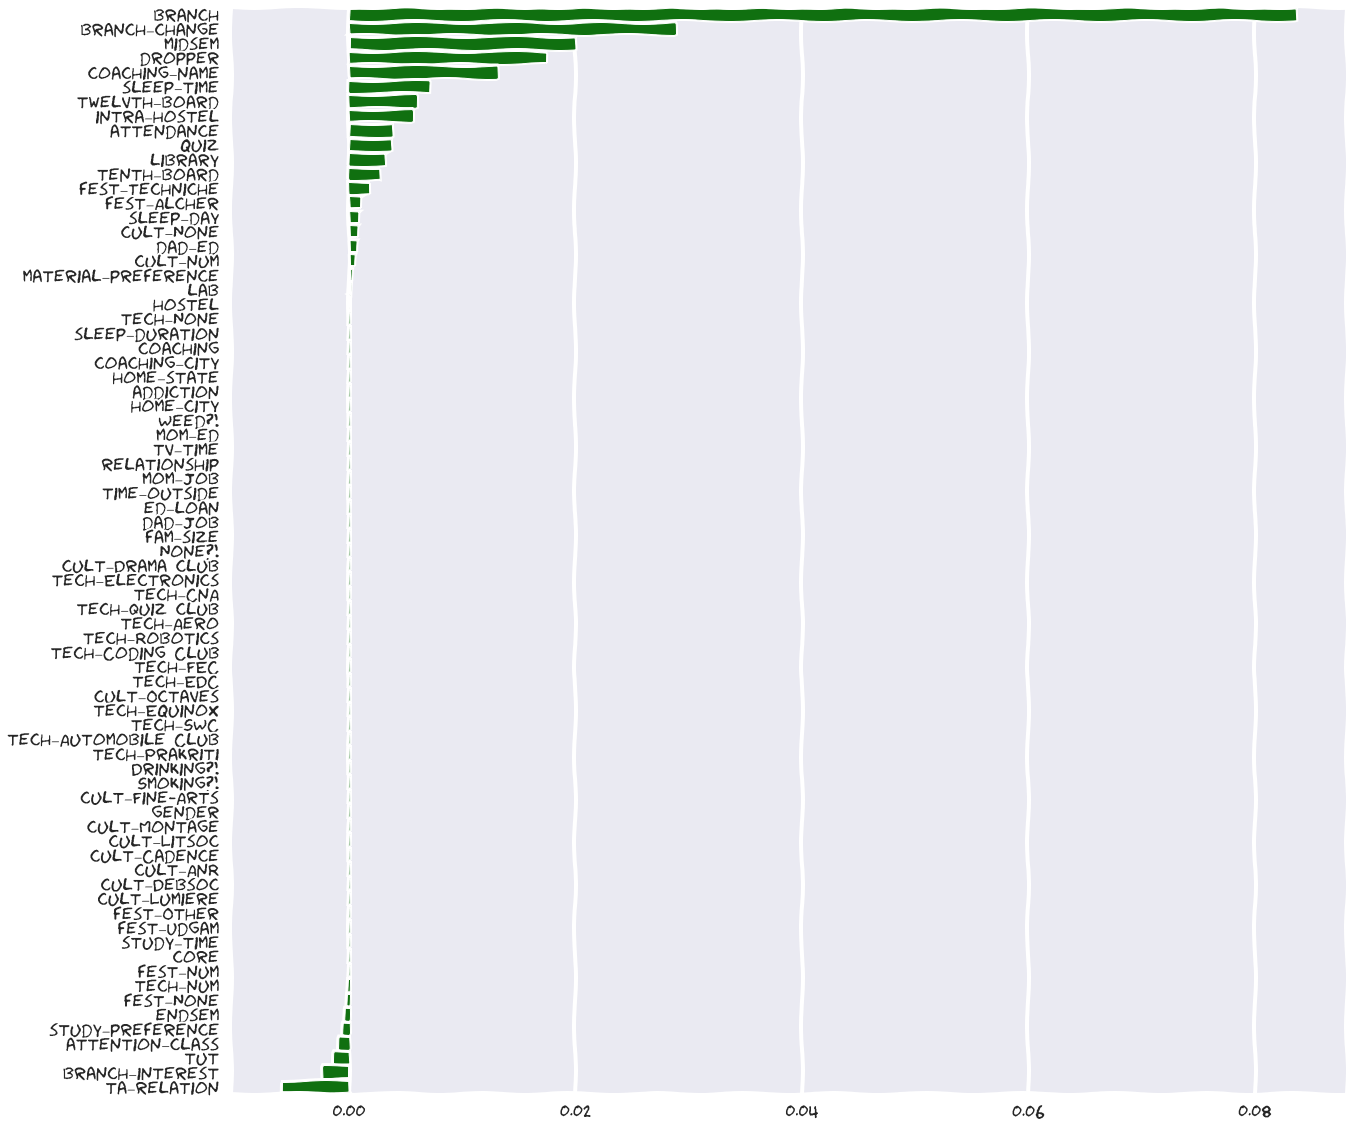

In [40]:
fig,axes=plt.subplots(figsize=(20,20))
sns.barplot(x=fi,y=fi.index,order=fi.sort_values(ascending=False).index,ax=axes,color='green');

In [44]:
#best validation rmse before dropping study time: 1.32072
#after dropping study time - 1.29927
#core - 1.29457
#endsem - 1.29187
#lab - 1.29094
#fest-num - 1.2907
#library - 1.28756
#intra_hostel - 1.28372
#material_reference - 1.28302
#cult_none, fest_alcher - 1.27972
#cult_num, study_preference - 1.27798

#removing many negative feeding columns -- 1.27319

df_enc.reset_index(inplace=True,drop=True)
# df_enc.drop(['level_0','index'],axis=1,inplace=True)

to_drop=['cpi', 'core',
       'study_time','endsem','lab',
         'fest_num','library', 'intra_hostel',
         'material_preference',
         'cult_None',
         'cult_num', 'study_preference', 'relationship', 'ed_loan', 'sleep_time',
       'tech_FEC', 'tenth_board', 'fest_Udgam', 'fest_Other', 'cult_Debsoc',
       'cult_AnR', 'cult_Cadence', 'cult_Litsoc', 'cult_Montage',
       'cult_Lumiere', 'gender', 'Weed?!', 'cult_Fine-Arts', 'tech_Quiz club',
       'tech_Electronics', 'tech_EDC', 'tech_Equinox', 'tech_SWC',
       'tech_Automobile Club', 'tech_Prakriti', 'Drinking?!', 'Smoking?!',
       'cult_Octaves', 'cult_Drama club', 'None?!', 'coaching_city',
       'home_state', 'home_city', 'addiction', 'fam_size', 'sleep_duration',
       'tv_time', 'time_outside', 'dad_job', 'mom_job','mom_ed',
       'coaching','tech_None',
        ]
X_train=df_enc.iloc[train_index].drop(to_drop,axis=1)
X_valid=df_enc.iloc[val_index].drop(to_drop,axis=1)

y_train=df_enc.cpi[train_index]
y_valid=df_enc.cpi[val_index]

train_df=lgb.Dataset(X_train,label=y_train,free_raw_data=False)
valid_df=lgb.Dataset(X_valid,label=y_valid,free_raw_data=False)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'is_training_metric': True,
    'metric_freq': 5,
#     'num_leaves': 64,
    'learning_rate': 0.005,
    'lambda_l2': 0.01,
    'feature_fraction': 0.74,
    'bagging_fraction': 0.86,
    'bagging_freq': 1,
    'verbose': 0,
#     'min_child_weight':20,
}

cats=[
#     'gender',
      'dropper',
       'twelvth_board', 
#     'coaching_city',
#        'home_state', 
#     'home_city', 
#     'fam_size',
#     'mom_job',
#        'dad_job', 
#     'ed_loan','mom_ed',
#        'time_outside', 
    'attendance',
#     'tv_time',
#         'sleep_duration', 
    'sleep_day', 
#     'addiction',
#        'material_preference'
     ]

cpi_model_2=lgb.train(
    params,
    train_df,
    valid_sets=[train_df,valid_df],
    early_stopping_rounds=50,
    num_boost_round=10000,
    categorical_feature=cats
)

[1]	training's rmse: 1.1695	valid_1's rmse: 1.29583
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 1.16765	valid_1's rmse: 1.29478
[3]	training's rmse: 1.16593	valid_1's rmse: 1.29376
[4]	training's rmse: 1.16408	valid_1's rmse: 1.293
[5]	training's rmse: 1.16242	valid_1's rmse: 1.29257
[6]	training's rmse: 1.16033	valid_1's rmse: 1.29122
[7]	training's rmse: 1.15846	valid_1's rmse: 1.29027
[8]	training's rmse: 1.15703	valid_1's rmse: 1.28921
[9]	training's rmse: 1.15539	valid_1's rmse: 1.28829
[10]	training's rmse: 1.15332	valid_1's rmse: 1.28682
[11]	training's rmse: 1.15165	valid_1's rmse: 1.2857
[12]	training's rmse: 1.15048	valid_1's rmse: 1.28519
[13]	training's rmse: 1.14935	valid_1's rmse: 1.28436
[14]	training's rmse: 1.148	valid_1's rmse: 1.28365
[15]	training's rmse: 1.14678	valid_1's rmse: 1.28314
[16]	training's rmse: 1.14534	valid_1's rmse: 1.28281
[17]	training's rmse: 1.14364	valid_1's rmse: 1.28174
[18]	training's rmse: 1.14188	valid_

[153]	training's rmse: 0.977744	valid_1's rmse: 1.20781
[154]	training's rmse: 0.977047	valid_1's rmse: 1.20781
[155]	training's rmse: 0.976099	valid_1's rmse: 1.20765
[156]	training's rmse: 0.975298	valid_1's rmse: 1.20752
[157]	training's rmse: 0.974324	valid_1's rmse: 1.20754
[158]	training's rmse: 0.973528	valid_1's rmse: 1.20739
[159]	training's rmse: 0.972639	valid_1's rmse: 1.20696
[160]	training's rmse: 0.9716	valid_1's rmse: 1.20641
[161]	training's rmse: 0.970748	valid_1's rmse: 1.20604
[162]	training's rmse: 0.969726	valid_1's rmse: 1.20565
[163]	training's rmse: 0.969048	valid_1's rmse: 1.20547
[164]	training's rmse: 0.967894	valid_1's rmse: 1.20481
[165]	training's rmse: 0.966929	valid_1's rmse: 1.20478
[166]	training's rmse: 0.966207	valid_1's rmse: 1.20459
[167]	training's rmse: 0.965314	valid_1's rmse: 1.20447
[168]	training's rmse: 0.964439	valid_1's rmse: 1.20412
[169]	training's rmse: 0.963673	valid_1's rmse: 1.20404
[170]	training's rmse: 0.962981	valid_1's rmse: 1.

[315]	training's rmse: 0.86874	valid_1's rmse: 1.17736
[316]	training's rmse: 0.868249	valid_1's rmse: 1.1773
[317]	training's rmse: 0.867509	valid_1's rmse: 1.17703
[318]	training's rmse: 0.867057	valid_1's rmse: 1.177
[319]	training's rmse: 0.866589	valid_1's rmse: 1.17685
[320]	training's rmse: 0.8662	valid_1's rmse: 1.1768
[321]	training's rmse: 0.865854	valid_1's rmse: 1.17677
[322]	training's rmse: 0.865214	valid_1's rmse: 1.17651
[323]	training's rmse: 0.864476	valid_1's rmse: 1.17648
[324]	training's rmse: 0.863983	valid_1's rmse: 1.17643
[325]	training's rmse: 0.863305	valid_1's rmse: 1.17622
[326]	training's rmse: 0.862775	valid_1's rmse: 1.1759
[327]	training's rmse: 0.862322	valid_1's rmse: 1.1758
[328]	training's rmse: 0.861774	valid_1's rmse: 1.17551
[329]	training's rmse: 0.861375	valid_1's rmse: 1.17545
[330]	training's rmse: 0.860896	valid_1's rmse: 1.17551
[331]	training's rmse: 0.860565	valid_1's rmse: 1.17553
[332]	training's rmse: 0.859974	valid_1's rmse: 1.17528
[

[476]	training's rmse: 0.804413	valid_1's rmse: 1.17032
[477]	training's rmse: 0.804109	valid_1's rmse: 1.17039
[478]	training's rmse: 0.803747	valid_1's rmse: 1.17034
[479]	training's rmse: 0.803326	valid_1's rmse: 1.17037
[480]	training's rmse: 0.802899	valid_1's rmse: 1.17037
[481]	training's rmse: 0.802481	valid_1's rmse: 1.17031
[482]	training's rmse: 0.802302	valid_1's rmse: 1.17036
[483]	training's rmse: 0.801985	valid_1's rmse: 1.17041
[484]	training's rmse: 0.801737	valid_1's rmse: 1.17042
[485]	training's rmse: 0.801472	valid_1's rmse: 1.17067
[486]	training's rmse: 0.801093	valid_1's rmse: 1.17062
[487]	training's rmse: 0.800583	valid_1's rmse: 1.17058
[488]	training's rmse: 0.800295	valid_1's rmse: 1.17063
[489]	training's rmse: 0.799992	valid_1's rmse: 1.17068
[490]	training's rmse: 0.799737	valid_1's rmse: 1.17065
Early stopping, best iteration is:
[440]	training's rmse: 0.816731	valid_1's rmse: 1.16952


Wall time: 10.4 s


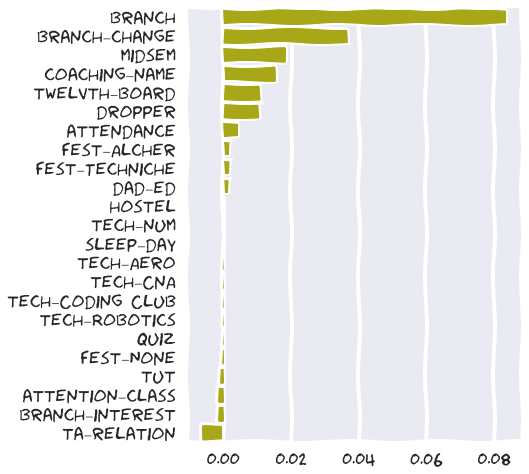

In [45]:
%%time
from sklearn.metrics import mean_squared_error as rmse

def score(X, y):
    y_pred = cpi_model_2.predict(X)
    return rmse(y_pred,y, squared=False)

X_valid.reset_index(inplace=True,drop=True)
y_valid.reset_index(inplace=True,drop=True)
# base_score, score_decreases = get_score_importances(score, X_valid, y_valid)
# feature_importances = np.mean(score_decreases, axis=0)

base_score=score(X_valid,y_valid)
fi=pd.Series(index=X_valid.columns)
for col in X_valid.columns:
    X_bot=X_valid.copy()
    diff=[]
    curr=X_valid[col].values.copy()
    for _ in range(20):
        random.shuffle(curr)
        X_bot[col]=curr
        now_score=score(X_bot,y_valid)
        diff.append(now_score-base_score)
    fi[col]=np.array(diff).mean()
    
fig,axes=plt.subplots(figsize=(6,8));
sns.barplot(x=fi,y=fi.index,order=fi.sort_values(ascending=False).index,ax=axes,color='y');